# QF627 Group 9 - Group Takehome Assessment

##Members:

- DURGHESHWARI Do Elamurugu
- HAO Xuanheng
- KHOR Shuo En
- NADEZHDA Khusnetdinova
- SUGINTHA Sivaneswaran

## Project Overview:
This final assignment aimed to design, implement, and evaluate five distinct trading strategies, leveraging various quantitative techniques, including mean reversion, vectorized backtesting of regression-based strategies, and supervised machine learning.

## Performance Metrics:
The final assignment assessed each strategy based on key performance metrics, including Sharpe ratio, Compound Annual Growth Rate (CAGR), maximum drawdown, cash left, and maximum drawdown period. These metrics provided a comprehensive understanding of the strategies' risk-adjusted returns, capital preservation, and drawdown characteristics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time
import datetime as dt
import re
!pip install ta
import ta
from ta.trend import IchimokuIndicator
import plotly.express as px
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

sp500 = web.get_data_yahoo("SPY", dt.date(2004, 11, 1), dt.date(2023, 11, 1))

capital = 100000

[*********************100%%**********************]  1 of 1 completed


In [ ]:

### ML libraries

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE

In [ ]:
df1 = sp500[["Adj Close"]] #sma 30
df2 = sp500[["Adj Close"]] #regression
df3 = sp500[["Adj Close"]] #ml
df4 = sp500[["Adj Close"]] #macd
df5 = sp500[["Adj Close"]] #rsi
df6 = sp500[["Adj Close"]] #ml
df7 = sp500                #ichimoku

## Mean Reversion Strategy
Done by: Khor Shuo En

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

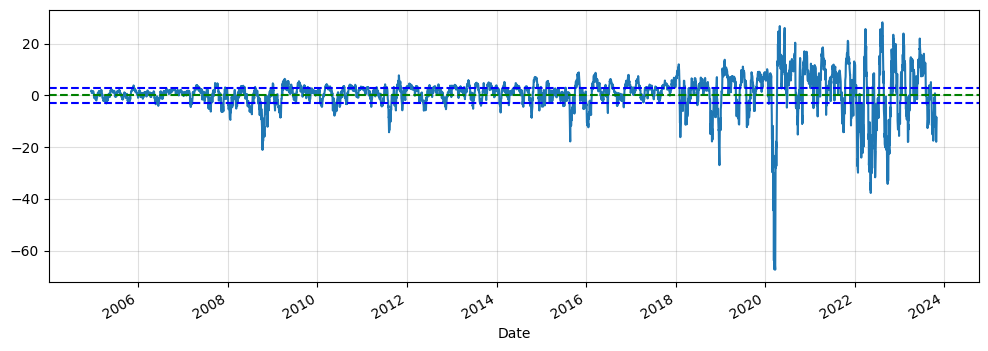

In [ ]:
df1["Returns"] =\
(np
    .log(df1["Adj Close"]
         /
         df1["Adj Close"]
         .shift(1)
        )
)

df1["SMA_30"] =\
(
    df1["Adj Close"]
    .rolling(window = 30)
    .mean()
)

threshold = 3

df1["Distance"] = df1["Adj Close"] - df1["SMA_30"]

(df1["Distance"]
 .dropna()
 .plot(figsize = [12, 4]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

<Axes: xlabel='Date'>

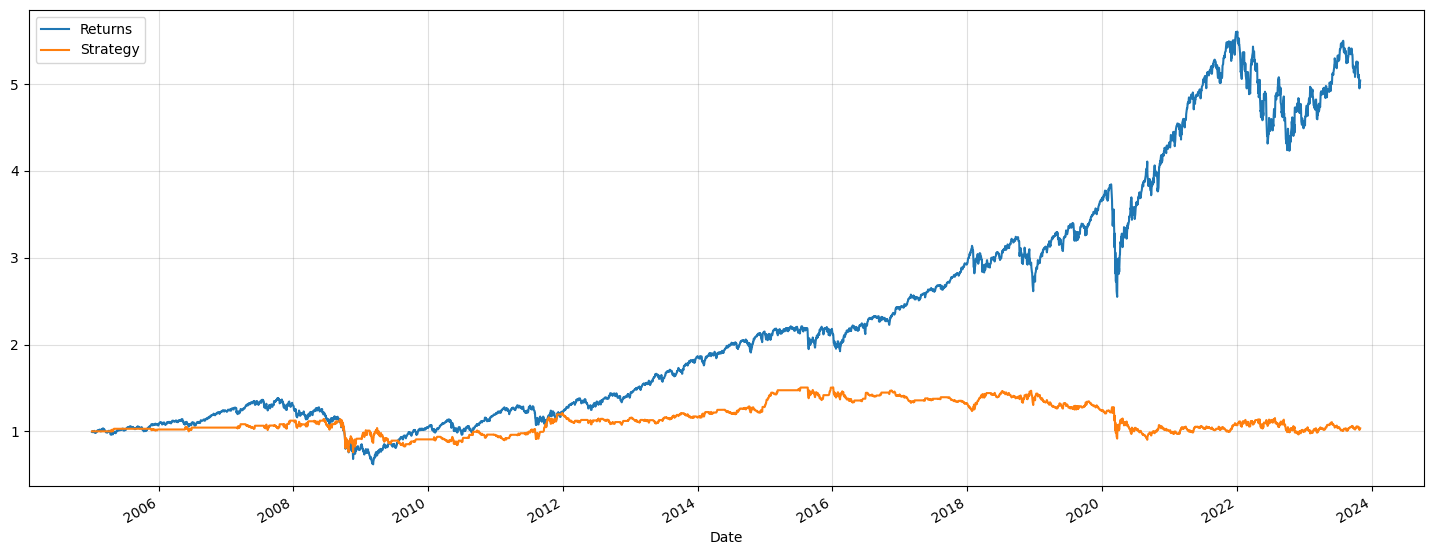

In [ ]:
df1["Trading_positions"] =\
(
    np
    .where(df1["Distance"] > threshold, # overbought --> sell (short)
           -1, np.nan)
)

df1["Trading_positions"] =\
(
    np
    .where(df1["Distance"] < -threshold, # oversold --> buy (long)
           1, df1["Trading_positions"] # gives back to the original value of the above gold["trading_positions"]
          )
)

df1["Trading_positions"] =\
(
    np
    #           +                            -
    #           -                            +
    .where(df1["Distance"] * df1["Distance"].shift(1) < 0, # oversold --> buy (long)
           0, df1["Trading_positions"]
          )
)

df1["Trading_positions"] =\
    (df1["Trading_positions"]
     .ffill()
    )

df1["Strategy"] =\
    (
    df1
    ["Trading_positions"]
    .shift(1)
    *
    df1["Returns"]
    )

(
    df1
    [["Returns", "Strategy"]]
    .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)

In [ ]:
df1

,Adj Close,Returns,SMA_30,Distance,Trading_positions,Strategy
Date,,,,,,
2004-11-01,78.617958,NaN,NaN,NaN,NaN,NaN
2004-11-02,78.645638,0.000352,NaN,NaN,NaN,NaN
2004-11-03,79.636070,0.012515,NaN,NaN,NaN,NaN
2004-11-04,80.723442,0.013562,NaN,NaN,NaN,NaN
2004-11-05,81.229065,0.006244,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-25,417.549988,-0.014456,430.884568,-13.334580,1.0,-0.014456
2023-10-26,412.549988,-0.012047,429.677001,-17.127013,1.0,-0.012047
2023-10-27,410.679993,-0.004543,428.587334,-17.907342,1.0,-0.004543


Best Parameters: {'SMA_Window': 10, 'Threshold': 2.0}
Best Total Return: 1.3251336914625775


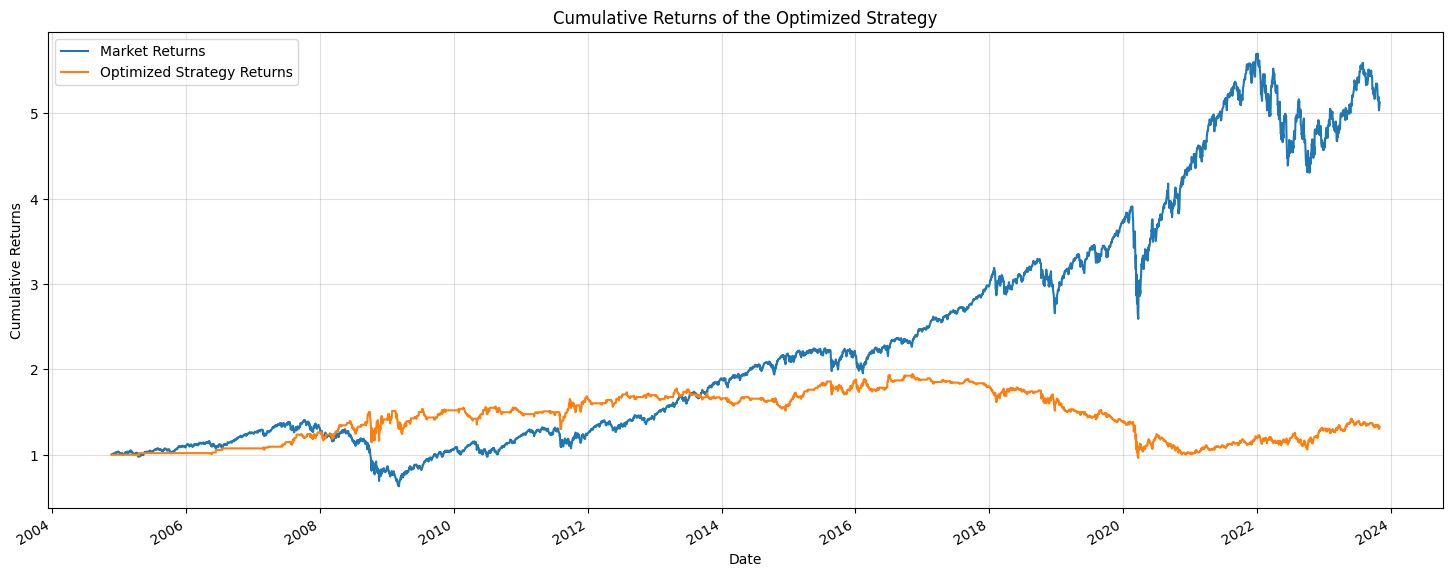

In [ ]:
# Calculate Returns
df1["Returns"] = np.log(df1["Adj Close"] / df1["Adj Close"].shift(1))

# Define a range of SMA window sizes and threshold values to experiment with
sma_window_range = range(10, 91, 10)
threshold_range = np.arange(2.0, 4.1, 0.5)

# Initialize variables to store the best parameters and performance
best_return = float("-inf")
best_params = None

# Iterate over SMA window sizes and threshold values
for sma_window in sma_window_range:
    for threshold in threshold_range:
        # Calculate SMA with the current window size
        df1["SMA"] = df1["Adj Close"].rolling(window=sma_window).mean()

        # Calculate the distance between Adj Close and SMA
        df1["Distance"] = df1["Adj Close"] - df1["SMA"]

        # Generate Trading Signals based on the current threshold
        df1["Trading_positions"] = np.where(df1["Distance"] > threshold, -1, np.nan)
        df1["Trading_positions"] = np.where(df1["Distance"] < -threshold, 1, df1["Trading_positions"])
        df1["Trading_positions"] = np.where(df1["Distance"] * df1["Distance"].shift(1) < 0, 0, df1["Trading_positions"])
        df1["Trading_positions"] = df1["Trading_positions"].ffill()

        # Generate Strategy Returns
        df1["Strategy"] = df1["Trading_positions"].shift(1) * df1["Returns"]

        # Calculate total return of the strategy
        total_return = df1["Strategy"].dropna().cumsum().apply(np.exp).iloc[-1]

        # Check if current parameters yield a better return
        if total_return > best_return:
            best_return = total_return
            best_params = {"SMA_Window": sma_window, "Threshold": threshold}

# Print the best parameters and total return
print("Best Parameters:", best_params)
print("Best Total Return:", best_return)

# Plot the strategy with the best parameters
df1["SMA"] = df1["Adj Close"].rolling(window=best_params["SMA_Window"]).mean()
df1["Distance"] = df1["Adj Close"] - df1["SMA"]
df1["Trading_positions"] = np.where(df1["Distance"] > best_params["Threshold"], -1, np.nan)
df1["Trading_positions"] = np.where(df1["Distance"] < -best_params["Threshold"], 1, df1["Trading_positions"])
df1["Trading_positions"] = np.where(df1["Distance"] * df1["Distance"].shift(1) < 0, 0, df1["Trading_positions"])
df1["Trading_positions"] = df1["Trading_positions"].ffill()
df1["Strategy"] = df1["Trading_positions"].shift(1) * df1["Returns"]

# Plot Cumulative Returns
cumulative_returns = df1[["Returns", "Strategy"]].dropna().cumsum().apply(np.exp)
cumulative_returns.plot(figsize=[18, 7])
plt.title("Cumulative Returns of the Optimized Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(["Market Returns", "Optimized Strategy Returns"])
plt.show()

Experimenting with different window sizes. Different timeframes might capture different trends or smooth out noise differently. Adjust the threshold value.A higher threshold may result in fewer signals but potentially more reliable ones. Performed grid search over different SMA window sizes and threshold values. Identifies the parameter combination that maximizes the total return of the strategy. It then plots the cumulative returns of both the market and the optimized strategy. Adjust the ranges and increments of the parameters as needed for your specific optimization goals.


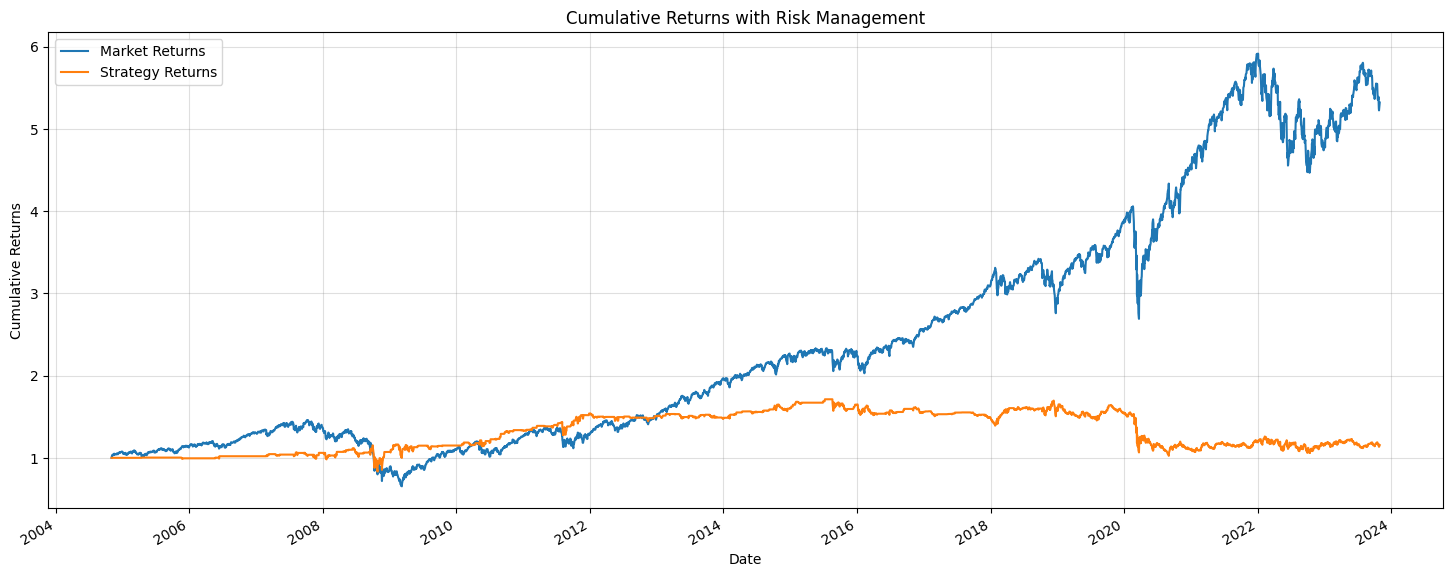

In [ ]:
# Calculate Returns
df1["Returns"] = np.log(df1["Adj Close"] / df1["Adj Close"].shift(1))

# Define strategy parameters
sma_window = 30
threshold = 3
stop_loss_threshold = 1.5  # Adjust based on your risk tolerance

# Calculate SMA with the fixed window size
df1["SMA"] = df1["Adj Close"].rolling(window=sma_window).mean()

# Calculate the distance between Adj Close and SMA
df1["Distance"] = df1["Adj Close"] - df1["SMA"]

# Initialize trading signals and trading positions columns
df1["Trading_Signals"] = 0
df1["Trading_Positions"] = 0

# Generate Trading Signals based on the threshold
df1.loc[df1["Distance"] > threshold, "Trading_Signals"] = -1  # Sell Signal
df1.loc[df1["Distance"] < -threshold, "Trading_Signals"] = 1  # Buy Signal

# Generate Trading Positions
df1["Trading_Positions"] = df1["Trading_Signals"].shift(1)

# Apply stop-loss: Exit position if the distance exceeds the stop-loss threshold in the opposite direction
df1["Stop_Loss"] = 0
df1.loc[df1["Trading_Positions"] == 1, "Stop_Loss"] = df1["Adj Close"] - (stop_loss_threshold * df1["Distance"].std())
df1.loc[df1["Trading_Positions"] == -1, "Stop_Loss"] = df1["Adj Close"] + (stop_loss_threshold * df1["Distance"].std())

# Apply stop-loss by setting Trading Positions to 0 if the current price is below the stop-loss level for long positions
df1.loc[(df1["Trading_Positions"] == 1) & (df1["Adj Close"] < df1["Stop_Loss"]), "Trading_Positions"] = 0

# Apply stop-loss by setting Trading Positions to 0 if the current price is above the stop-loss level for short positions
df1.loc[(df1["Trading_Positions"] == -1) & (df1["Adj Close"] > df1["Stop_Loss"]), "Trading_Positions"] = 0

# Calculate Strategy Returns
df1["Strategy_Returns"] = df1["Trading_Positions"] * df1["Returns"]

# Plot Cumulative Returns
cumulative_returns = df1[["Returns", "Strategy_Returns"]].cumsum().apply(np.exp)
cumulative_returns.plot(figsize=[18, 7])
plt.title("Cumulative Returns with Risk Management")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(["Market Returns", "Strategy Returns"])
plt.show()


Integrating risk management into strategy is crucial for protecting capital.
One common risk management technique is to use a stop-loss mechanism.
Modifying existing strategy to include a stop-loss based on the opposite direction of the distance. A stop-loss level is calculated based on the opposite direction of the distance and a user-defined threshold (stop_loss_threshold). The strategy is adjusted to exit a position (set Trading Positions to 0) if the current price falls below the stop-loss level for long positions or rises above the stop-loss level for short positions.
This implementation aims to limit losses by exiting positions when the market moves against the initial trade. Adjust the stop_loss_threshold parameter based on your risk tolerance and the characteristics of the financial instrument you are trading.

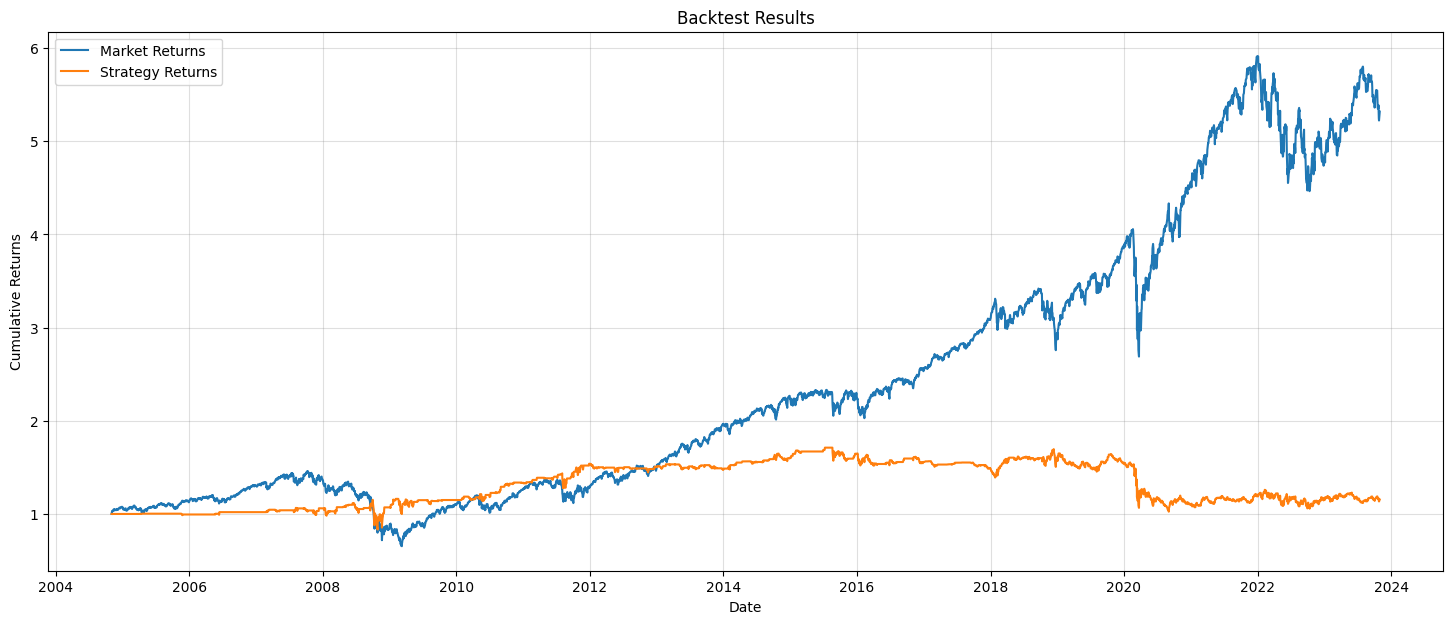

In [ ]:
# Calculate Returns
df1["Returns"] = np.log(df1["Adj Close"] / df1["Adj Close"].shift(1))

# Define strategy parameters
sma_window = 30
threshold = 3

# Calculate SMA with the fixed window size
df1["SMA"] = df1["Adj Close"].rolling(window=sma_window).mean()

# Calculate the distance between Adj Close and SMA
df1["Distance"] = df1["Adj Close"] - df1["SMA"]

# Initialize trading signals and trading positions columns
df1["Trading_Signals"] = 0
df1["Trading_Positions"] = 0

# Generate Trading Signals based on the threshold
df1.loc[df1["Distance"] > threshold, "Trading_Signals"] = -1  # Sell Signal
df1.loc[df1["Distance"] < -threshold, "Trading_Signals"] = 1  # Buy Signal

# Generate Trading Positions
df1["Trading_Positions"] = df1["Trading_Signals"].shift(1)

# Calculate Strategy Returns
df1["Strategy_Returns"] = df1["Trading_Positions"] * df1["Returns"]

# Calculate Cumulative Returns
df1["Cumulative_Market_Returns"] = df1["Returns"].cumsum().apply(np.exp)
df1["Cumulative_Strategy_Returns"] = df1["Strategy_Returns"].cumsum().apply(np.exp)

# Plot Cumulative Returns
plt.figure(figsize=[18, 7])
plt.plot(df1.index, df1["Cumulative_Market_Returns"], label="Market Returns")
plt.plot(df1.index, df1["Cumulative_Strategy_Returns"], label="Strategy Returns")
plt.title("Backtest Results")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


Backtesting is a crucial step to evaluate the historical performance of your trading strategy. It involves applying the strategy to past data to simulate how it would have performed.

In [ ]:
def annualized_sharpe_ratio(df):

    total_days = df.shape[0]
    total_years = total_days / 252

    daily_std = df.std()
    annualized_std = daily_std * np.sqrt(total_years)

    daily_mean = df.mean()
    annualized_mean = daily_mean * total_years

    annualized_sharpe = annualized_mean / annualized_std

    return annualized_sharpe

In [ ]:
Sharpe_MR = annualized_sharpe_ratio(df1["Strategy"])
Sharpe_MR

0.002910014011899773

In [ ]:
def CalculateCashReturn(dataframe,capital):


    #Calculate cummulative strategy return
    dataframe['CUMULATIVE STRATEGY'] = \
        dataframe['Strategy'].cumsum().apply(np.exp)

    #Final cash return
    capital = \
        capital * dataframe['CUMULATIVE STRATEGY'].iloc[-1]

    return capital

In [ ]:
capital = 1e5
MR_Cash = CalculateCashReturn(df1,capital)
MR_Cash

103478.1305565208

In [ ]:
def CalculateCAGR(dataframe, final_Cash):

    # Drop Nan Values to avoid unnessesary day values
    dataframe = \
        dataframe.dropna()

    # Calculate days between Start and End date of our df
    days = \
        (
            (dataframe.index[-1] - dataframe.index[0])
            .days
        )

    # Calculate CAGR
    CAGR =\
        (
            (
              (
                (final_Cash) / capital
              )
                **(365.0/days)
            )
            - 1
        )

    return round(CAGR*100,2)

In [ ]:
CalculateCAGR(df1, MR_Cash)

0.18

<Axes: xlabel='Date'>

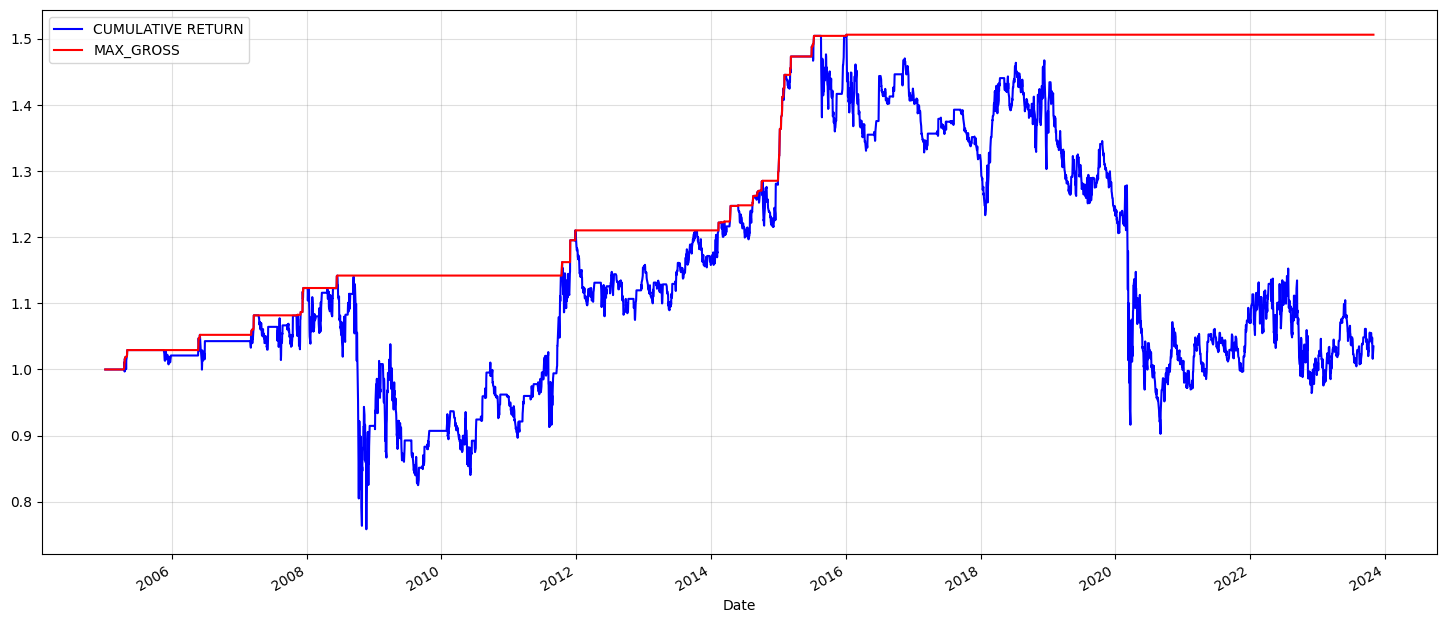

In [ ]:
df1['CUMULATIVE RETURN'] = \
    df1['Strategy'].cumsum().apply(np.exp)

df1['MAX_GROSS'] = \
    df1['CUMULATIVE RETURN'].cummax()

(
    df1
    [['CUMULATIVE RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8],
          color=['blue', 'red']
         )
)

In [ ]:
drawdown_MR = (df1['CUMULATIVE RETURN']/df1['MAX_GROSS']) - 1

drawdown_MR.min()

-0.4007349784070787

In [ ]:
periods_MR =\
(
    drawdown_MR[drawdown_MR == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_MR[drawdown_MR == 0].index[   : -1].to_pydatetime()
)
periods_MR.max()

datetime.timedelta(days=1218)

## Vectorized Backtesting of Regression-based Strategy

Done by: Khor Shuo En

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

 1.0    2435
-1.0    2326
 0.0      16
dtype: int64
For Vectorized Backtesting of Regression-based Strategy, the prediction is 2435 times correct and 2326 wrong, which translates into a hit ratio of about 50.97%.


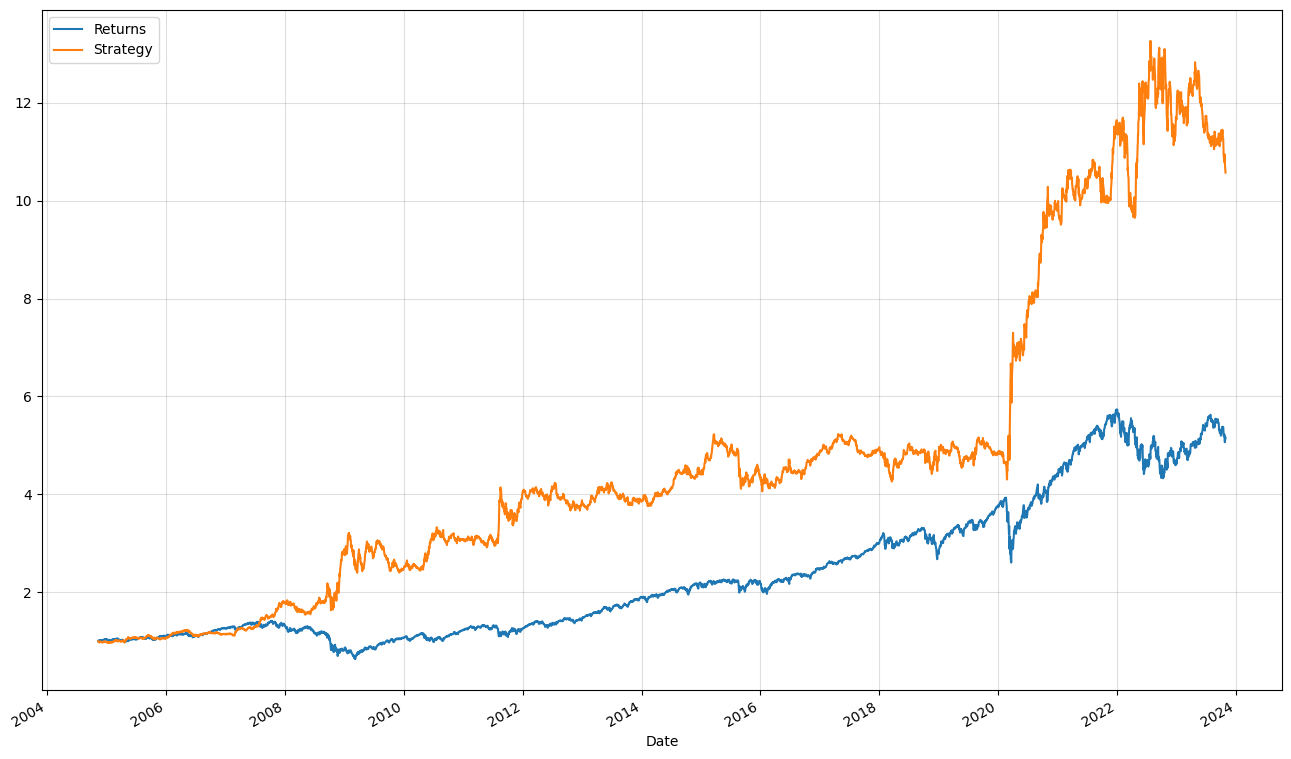

In [ ]:
df2 = sp500[["Adj Close"]]
COLS = []
LAGS = 5

df2["Returns"] =\
(np
    .log(df2["Adj Close"]
         /
         df2["Adj Close"]
         .shift(1)
        )
)

for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    df2[COL] = df2["Returns"].shift(LAG)
    COLS.append(COL)

df2 = df2.dropna()

REGRESSION =\
    np \
    .linalg \
    .lstsq(df2[COLS],
           np.sign(df2["Returns"]
                  ),
           rcond = None)[0]

df2["Prediction"] =\
    np \
    .sign(np.dot(df2[COLS],
                 REGRESSION)
         )

df2["Strategy"] = df2["Prediction"] * df2["Returns"]

df2 \
    [["Returns", "Strategy"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

HIT_RATIO =\
    np \
    .sign(df2["Returns"] * df2["Prediction"]
          ).value_counts()

print(HIT_RATIO)

HIT_RATIO.values[0] / sum(HIT_RATIO)

print(f"For Vectorized Backtesting of Regression-based Strategy, the prediction is {HIT_RATIO[1]} times correct and {HIT_RATIO[-1]} wrong, which translates into a hit ratio of about {HIT_RATIO.values[0] / sum(HIT_RATIO) * 100:.2f}%.")

In [ ]:
df2['Strategy'].sum(

)

2.3582158536438147

In [ ]:
df2

,Adj Close,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction,Strategy
Date,,,,,,,,,
2004-11-09,80.952011,-0.001966,-0.001451,0.006244,0.013562,0.012515,0.000352,1.0,-0.001966
2004-11-10,81.014366,0.000770,-0.001966,-0.001451,0.006244,0.013562,0.012515,-1.0,-0.000770
2004-11-11,81.630775,0.007580,0.000770,-0.001966,-0.001451,0.006244,0.013562,-1.0,-0.007580
2004-11-12,82.274910,0.007860,0.007580,0.000770,-0.001966,-0.001451,0.006244,-1.0,-0.007860
2004-11-15,82.477058,0.002454,0.007860,0.007580,0.000770,-0.001966,-0.001451,-1.0,-0.002454
...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,-0.014456,0.007511,-0.001735,-0.012364,-0.008825,-0.013415,-1.0,0.014456
2023-10-26,412.549988,-0.012047,-0.014456,0.007511,-0.001735,-0.012364,-0.008825,1.0,-0.012047
2023-10-27,410.679993,-0.004543,-0.012047,-0.014456,0.007511,-0.001735,-0.012364,1.0,-0.004543


Best LAGS Value: 20
Best Hit Ratio on Test Set: 0.5311475409836065


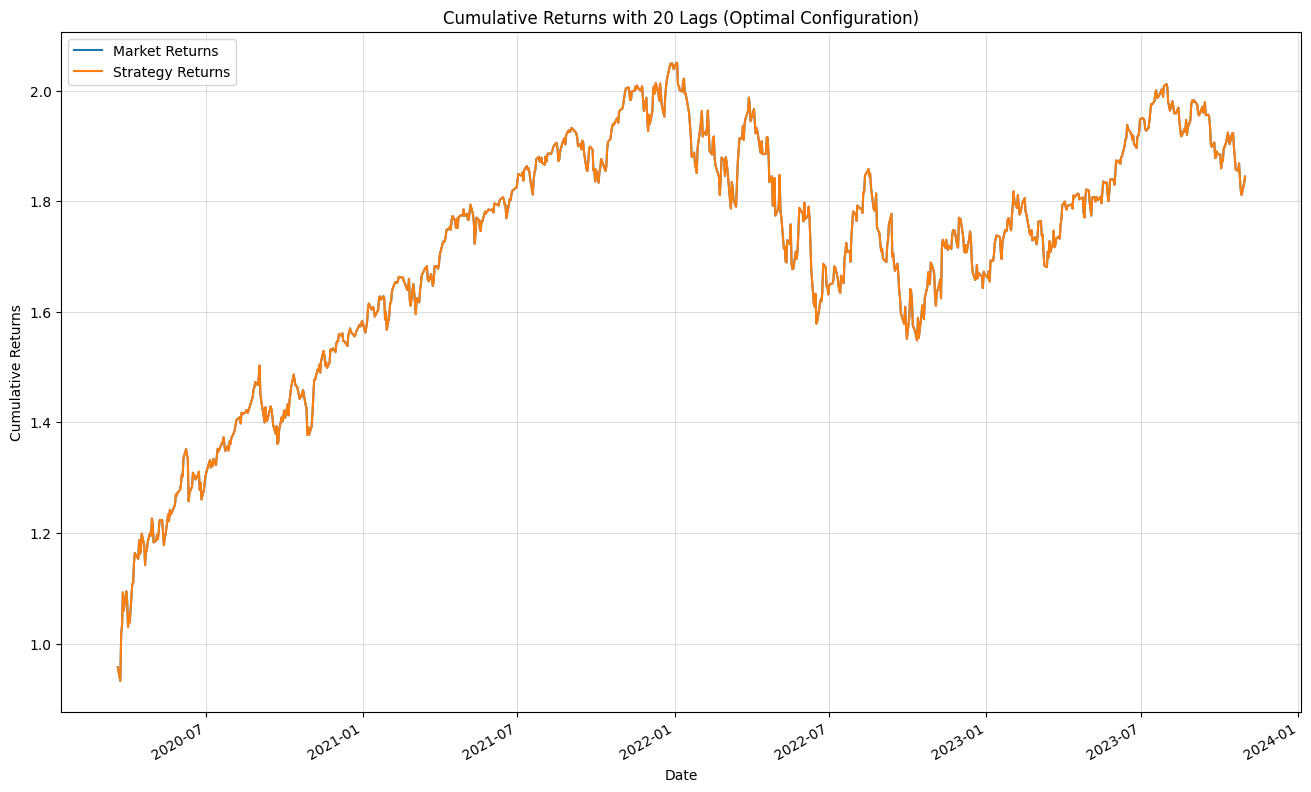

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df2 = sp500[["Adj Close"]].copy()

# Calculate Returns
df2["Returns"] = np.log(df2["Adj Close"] / df2["Adj Close"].shift(1))

# Define a range of LAGS values to experiment with
lags_range = range(1, 21)

# Initialize variables to store the best hyperparameters and performance
best_hit_ratio = 0
best_lags = None

for lags in lags_range:
    # Generate lagged returns as features
    for lag in range(1, lags + 1):
        df2[f"lag_{lag}"] = df2["Returns"].shift(lag)

    df2 = df2.dropna()

    # Train-test split
    train_size = int(len(df2) * 0.8)
    train_data, test_data_1 = df2[:train_size], df2[train_size:]

    # Fit Logistic Regression model
    X_train, y_train = train_data.iloc[:, 2:], np.sign(train_data["Returns"])
    X_test, y_test = test_data_1.iloc[:, 2:], np.sign(test_data_1["Returns"])

    model = LogisticRegression(random_state=0)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    test_data_1["Prediction"] = model.predict(X_test)

    # Calculate hit ratio on the test set
    hit_ratio = accuracy_score(test_data_1["Prediction"], np.sign(test_data_1["Returns"]))

    # Update best hyperparameters if the current configuration is better
    if hit_ratio > best_hit_ratio:
        best_hit_ratio = hit_ratio
        best_lags = lags

# Print the best hyperparameters and hit ratio
print("Best LAGS Value:", best_lags)
print("Best Hit Ratio on Test Set:", best_hit_ratio)

# Plot Cumulative Returns for the best configuration
for lag in range(1, best_lags + 1):
    df2[f"lag_{lag}"] = df2["Returns"].shift(lag)

df2 = df2.dropna()

# Train-test split using the best configuration
train_size = int(len(df2) * 0.8)
train_data, test_data_1 = df2[:train_size], df2[train_size:]

# Fit Logistic Regression model using the best configuration
X_train, y_train = train_data.iloc[:, 2:], np.sign(train_data["Returns"])
X_test, y_test = test_data_1.iloc[:, 2:], np.sign(test_data_1["Returns"])

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test set
test_data_1["Prediction"] = model.predict(X_test)

# Calculate strategy returns using the best configuration
test_data_1["Strategy"] = test_data_1["Prediction"] * test_data_1["Returns"]

# Plot Cumulative Returns
test_data_1[["Returns", "Strategy"]].cumsum().apply(np.exp).plot(figsize=(16, 10))
plt.title(f"Cumulative Returns with {best_lags} Lags (Optimal Configuration)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(["Market Returns", "Strategy Returns"])
plt.show()


In [ ]:
Sharpe_VB = annualized_sharpe_ratio(df2["Strategy"])
Sharpe_VB

0.1765977935821436

In [ ]:
capital = 1e5
VB_Cash = CalculateCashReturn(df2,capital)
VB_Cash

1057207.2491414042

In [ ]:
CalculateCAGR(df2, VB_Cash)

13.22

<Axes: xlabel='Date'>

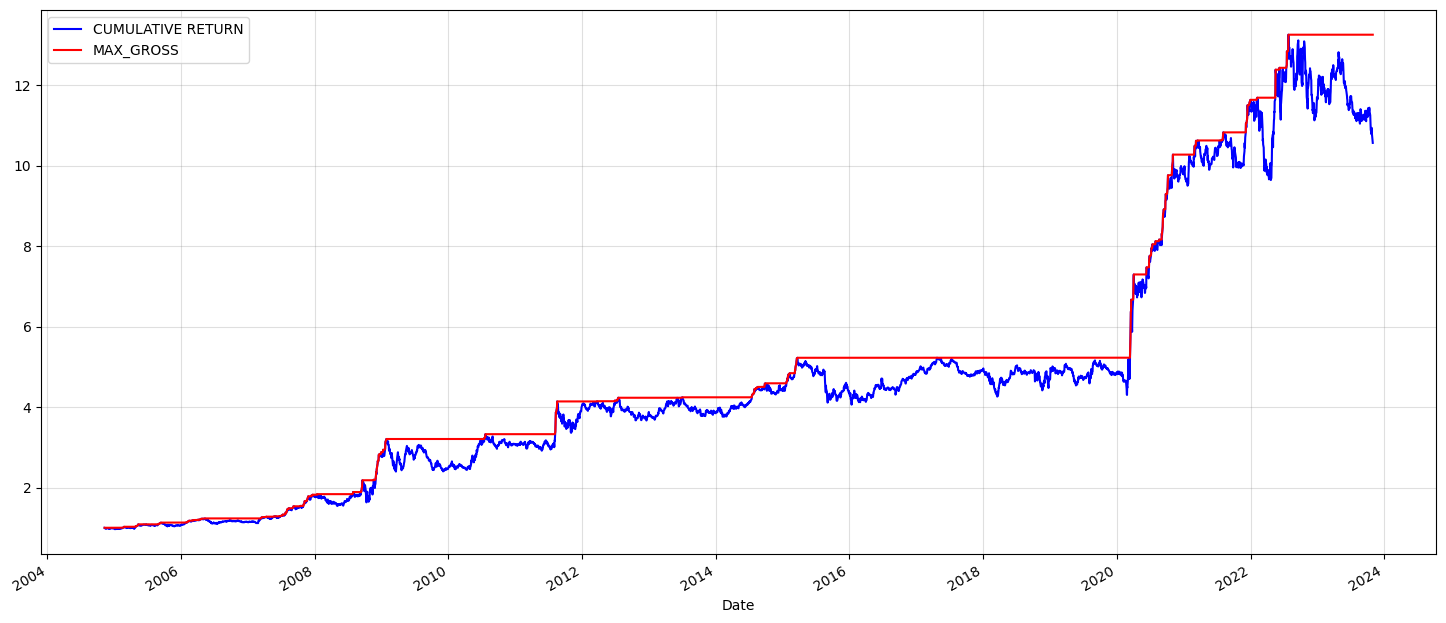

In [ ]:
df2['CUMULATIVE RETURN'] = \
    df2['Strategy'].cumsum().apply(np.exp)

df2['MAX_GROSS'] = \
    df2['CUMULATIVE RETURN'].cummax()


(
    df2
    [['CUMULATIVE RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8],
          color=['blue', 'red']
         )
)

In [ ]:
drawdown_VB = (df2['CUMULATIVE RETURN']/df2['MAX_GROSS']) - 1

-drawdown_VB.min()

0.25258440130740645

In [ ]:
periods_VB =\
(
    drawdown_VB[drawdown_VB == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_VB[drawdown_VB == 0].index[   : -1].to_pydatetime()
)
periods_VB.max()

datetime.timedelta(days=1057)

## Supervised Machine Learning

Done by: Nadia

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

Let's try out the supervised ML approach and include in our feature the lagged values of SPY. The return period is 1 trading week, and as predictors we take the 1, 3, 6 and 12-week lagged values.

In [ ]:
return_period = 5
Yy = (np.log(df3.loc[ : , ("Adj Close")]).diff(return_period).shift(-return_period))
Yy.name = (Yy.name[-1]+"_pred") # rename to specify our predictors
Y = Yy.loc['2005-01-27':] # this must match the 1st index of X
Y = (Y.fillna(method = "Ffill"))
# Y.isna().sum()

X = (pd.concat([np.log(df3.loc[ : , ("Adj Close")]).diff(i)
                     for i in [return_period,
                               return_period * 3,
                               return_period * 6,
                               return_period * 12]],axis = 1).dropna())
X.columns = ["SPY_DT", "SPY_3DT", "SPY_6DT", "SPY_12DT"]
#X.isna().sum()

data = (pd.concat([Y, X],axis = 1).dropna().iloc[ : :return_period, :])

In [ ]:
validation_size = 0.20 #this is our testing set
train_size = int(len(X)*(1 - validation_size))
X_train, X_test = (X[0:train_size], X[train_size:len(X)])
Y_train, Y_test = (Y[0:train_size], Y[train_size:len(X)])

num_folds = 10
seed = 19112023
scoring = "neg_mean_squared_error"

models = []

models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("SVR", SVR()))
models.append(("RFR", RandomForestRegressor()))
models.append(("ETR", ExtraTreesRegressor()))
models.append(("GBR", GradientBoostingRegressor()))
models.append(("ABR", AdaBoostRegressor()))

names = []
kfold_results = []
train_results = []
test_results = []

for name, model in models:

    names.append(name)
    kfold = (KFold(n_splits = num_folds, random_state = seed, shuffle = True))
    cv_results = (-1*cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring))
    kfold_results.append(cv_results)
    res = model.fit(X_train, Y_train)

# Evaluating Model on Training Set:
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

# Evaluating Model on Testing Set:
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

# Printing the Results:
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
                                     cv_results.std(),
                                     train_result,
                                     test_result)
    print(message)

LR: 0.000538 (0.000102) 0.000534 0.000900
LASSO: 0.000541 (0.000099) 0.000540 0.000887
EN: 0.000541 (0.000099) 0.000540 0.000887
CART: 0.000993 (0.000157) 0.000000 0.001566
KNN: 0.000510 (0.000084) 0.000337 0.001008
SVR: 0.000962 (0.000160) 0.000878 0.001189
RFR: 0.000523 (0.000074) 0.000072 0.000945
ETR: 0.000516 (0.000086) 0.000000 0.000923
GBR: 0.000527 (0.000081) 0.000367 0.000898
ABR: 0.000685 (0.000078) 0.000567 0.001088


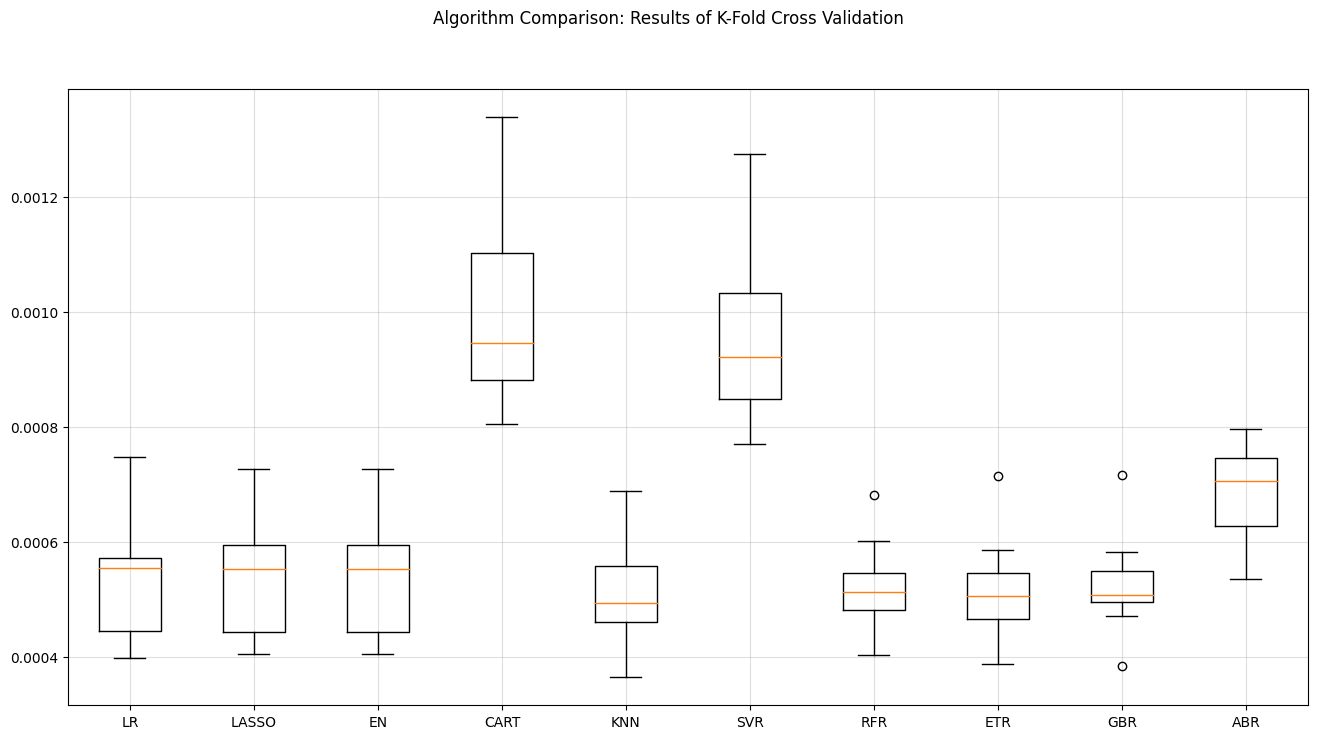

In [ ]:
fig = plt.figure(figsize = [16, 8])
fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.show()

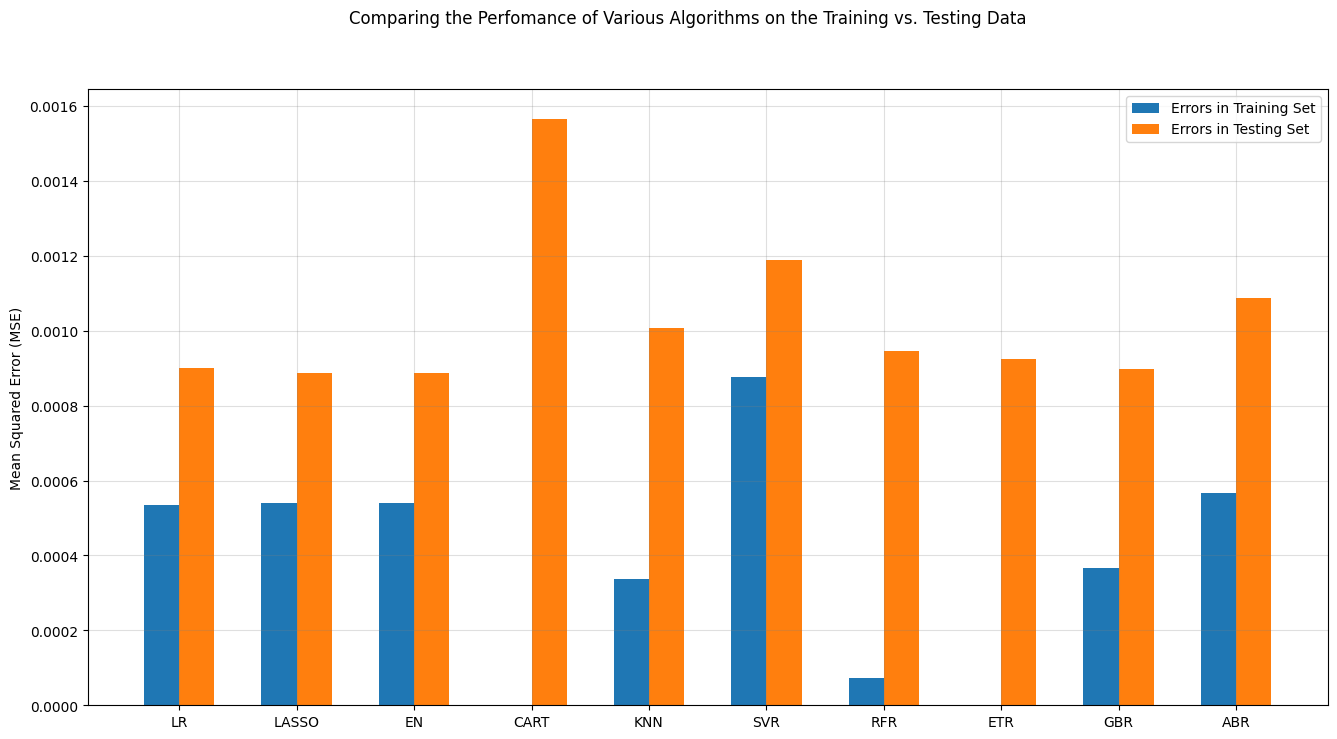

In [ ]:
fig = plt.figure(figsize = [16, 8])
ind = np.arange(len(names))
width = 0.30
fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")
ax = fig.add_subplot(111)
(plt.bar(ind - width/2, train_results, width = width, label = "Errors in Training Set"))
(plt.bar(ind + width/2, test_results, width = width, label = "Errors in Testing Set"))
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

In [ ]:
X_train_ARIMA = X_train
X_test_ARIMA = X_test
train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

# set p, d, q - they are in order
modelARIMA = (stats.ARIMA(endog = Y_train, exog = X_train_ARIMA, order = [1, 0, 0]))
model_fit = modelARIMA.fit()
error_training_ARIMA = (mean_squared_error(Y_train, model_fit.fittedvalues))
predicted = (model_fit.predict(start = train_len - 1, end = total_len - 1, exog = X_test_ARIMA)[1: ])
error_testing_ARIMA = (mean_squared_error(Y_test, predicted))

# append error testing arima to previous results
test_results.append(error_testing_ARIMA)
train_results.append(error_training_ARIMA)
names.append("ARIMA")

In [ ]:
ARIMA_Tuned = stats.ARIMA(endog = Y_train, exog = X_train_ARIMA, order = [2,1,1])
# input optimal set of hyperparameters here^
ARIMA_Fit_Tuned = ARIMA_Tuned.fit()
# let's calculate accuracy
Predicted_Tuned = model_fit.predict(start = train_len - 1, end = total_len - 1, exog = X_test_ARIMA)[1:]

# print out the error
print(mean_squared_error(Y_test,Predicted_Tuned))

0.0023071769126896758


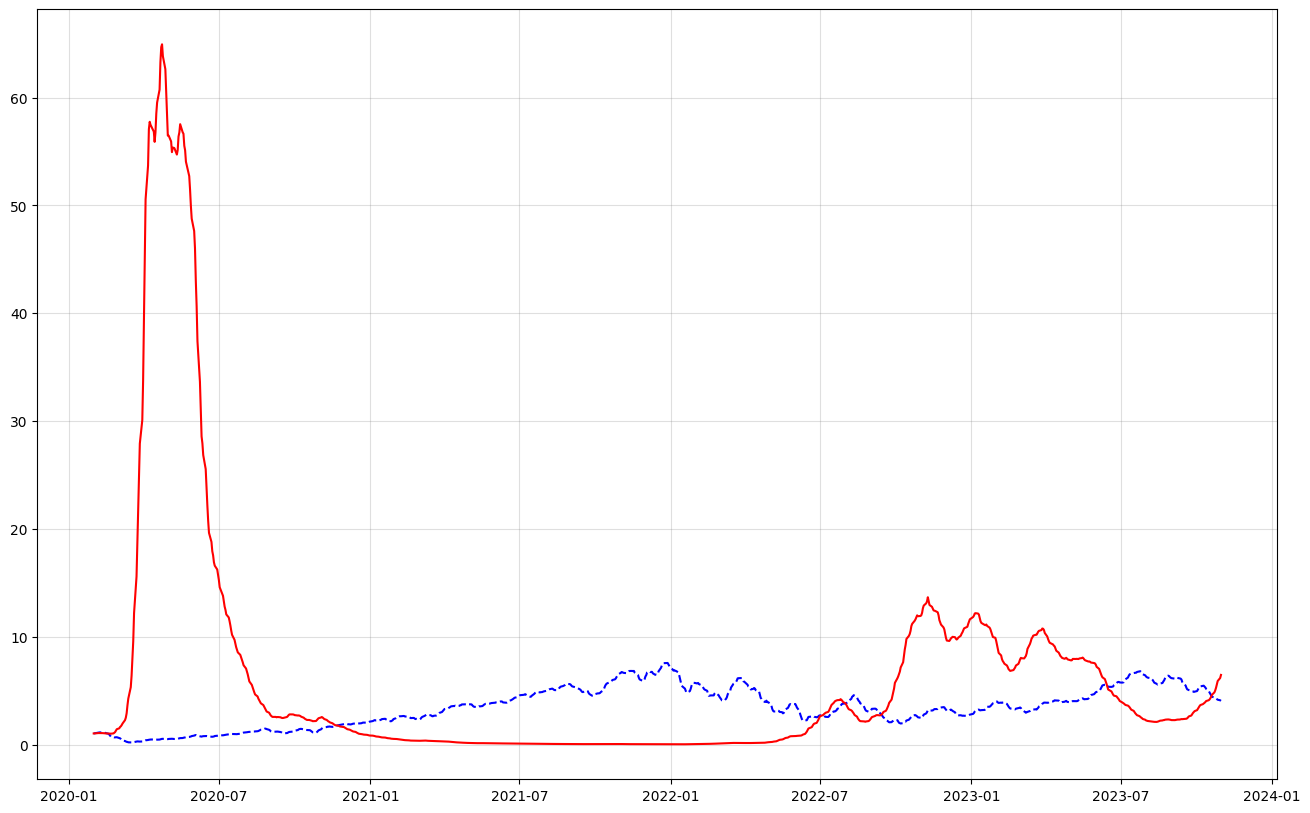

In [ ]:
plt.figure(figsize = (16, 10))
result = pd.DataFrame(Predicted_Tuned)
Predicted_Tuned.index = Y_test.index
plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")
plt.plot(np.exp(Predicted_Tuned).cumprod(), "r", label = "Predicted Y (Y hat)")
plt.show()

We can see that a simple linear regression is the best fit out of all, as the MSE value on testing set is lowest (0.000648). Still, the difference between MSE in train and test set is quite big, let's see if we can improve it by including more features, such as other indices and big cap stocks. Note that we have a serious constraint - SP500 is literally 500 major companies, and it is quite hard to find a major company (esp. in financial sector) that would hold predictive power and would not be in the list. Including a company from S&P 500 may arise multicollinearity problems.

In [ ]:
result = (Predicted_Tuned)
result

Date
2020-01-31    0.033021
2020-02-03    0.020989
2020-02-04    0.011735
2020-02-05    0.001851
2020-02-06   -0.000227
                ...   
2023-10-25    0.047999
2023-10-26    0.055249
2023-10-27    0.056021
2023-10-30    0.046542
2023-10-31    0.045296
Name: predicted_mean, Length: 945, dtype: float64

In [ ]:
result = result.to_frame()
result.columns = ['Strategy']
result

,Strategy
Date,
2020-01-31,0.033021
2020-02-03,0.020989
2020-02-04,0.011735
2020-02-05,0.001851
2020-02-06,-0.000227
...,...
2023-10-25,0.047999
2023-10-26,0.055249
2023-10-27,0.056021


In [ ]:
Sharpe_SL1 = annualized_sharpe_ratio(result["Strategy"])
Sharpe_SL1

0.09655705750391155

In [ ]:
capital = 1e5
SL1_Cash = CalculateCashReturn(result,capital)
SL1_Cash

646201.1800087064

In [ ]:
CalculateCAGR(result, SL1_Cash)

64.46

<Axes: xlabel='Date'>

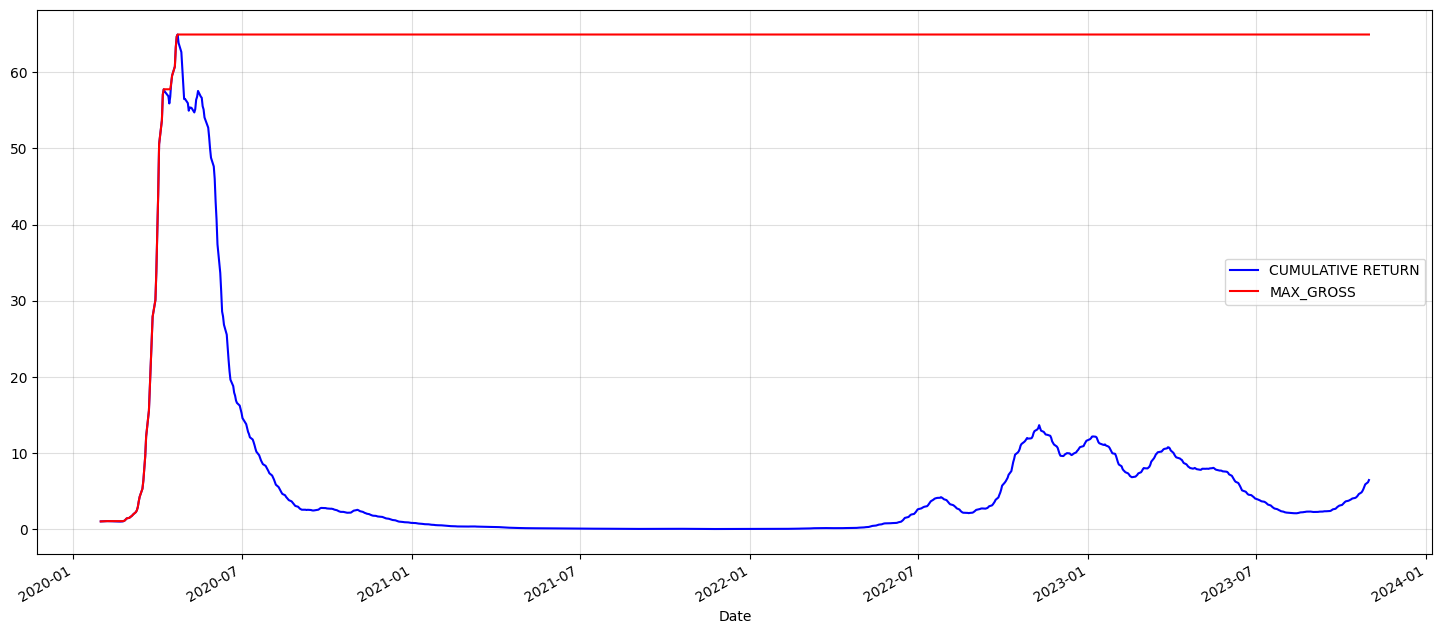

In [ ]:
result['CUMULATIVE RETURN'] = \
    result['Strategy'].cumsum().apply(np.exp)

result['MAX_GROSS'] = \
    result['CUMULATIVE RETURN'].cummax()


(
    result
    [['CUMULATIVE RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8],
          color=['blue', 'red']
         )
)

In [ ]:
drawdown_SL1 = (result['CUMULATIVE RETURN']/result['MAX_GROSS']) - 1

drawdown_SL1.min()

-0.999538905804683

In [ ]:
periods_SL1 =\
(
    drawdown_SL1[drawdown_SL1 == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_SL1[drawdown_SL1 == 0].index[   : -1].to_pydatetime()
)
periods_SL1.max()

datetime.timedelta(days=18)

# Supervised Machine Learning. Second attempt.

Done by: Nadia

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

#### We risked and included JPM stock despite it being in the list, so that one investment bank is included in the features

# Nouvelle section

In [ ]:
stock_ticker = ['SPY', 'TSLA', 'SQ', 'ZM', 'JPM', 'NFLX', 'ADBE', 'REGN', 'SHOP', 'PYPL', 'BABA']
index_ticker = ["IWN", "QQQ", "DIA", "VTI"]

stock_data = pdr.get_data_yahoo(stock_ticker, dt.date(2004, 11, 1), dt.date(2023, 11, 1))
index_data = pdr.get_data_yahoo(index_ticker, dt.date(2004, 11, 1), dt.date(2023, 11, 1))

Yy = (np.log(stock_data.loc[ : , ("Adj Close", "SPY")]).diff(return_period).shift(-return_period))
Yy.name = (Yy.name[-1]+"_pred") # rename to specify our predictors
Y = Yy.loc['2010-07-07':] # this must match the 1st index of X
Y = (Y.fillna(method = "Ffill"))
Y.isna().sum()

[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  4 of 4 completed


0

In [ ]:
### let's specify features
X1 =(np.log(stock_data.loc[ : , ("Adj Close", ('TSLA', 'SQ', 'ZM', 'JPM', 'NFLX', 'ADBE', 'REGN', 'SHOP', 'PYPL', 'BABA'))]).diff(return_period)) # calculate lagged logreturns
X1.columns = (X1.columns.droplevel())
X2 = (np.log(index_data).diff(return_period))
X2 = X2.drop(['Close'], axis=1)
columns_to_drop = X2.filter(like='Open').columns.tolist() + X2.filter(like='High').columns.tolist() + X2.filter(like='Low').columns.tolist() + X2.filter(like='Volume').columns.tolist()

X2 = X2.drop(columns=columns_to_drop, axis=1)
#X2 = X2.drop(X2.filter(like='Open'.columns, axis=1))
# now we create different lag df for spy
X3 = (pd.concat([np.log(stock_data.loc[ : , ("Adj Close", "SPY")]).diff(i)
                     for i in [return_period,
                               return_period * 3,
                               return_period * 6,
                               return_period * 12]],axis = 1).dropna())
X3.columns = ["SPY_DT", "SPY_3DT", "SPY_6DT", "SPY_12DT"]

# now we concat all features in one df
Xx = (pd.concat([X1, X2, X3],axis = 1))

X = Xx.loc['2004-11-01':]

X

,TSLA,SQ,ZM,JPM,NFLX,ADBE,REGN,SHOP,PYPL,BABA,"(Adj Close, DIA)","(Adj Close, IWN)","(Adj Close, QQQ)","(Adj Close, VTI)",SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
Date,,,,,,,,,,,,,,,,,,
2004-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.133178,-0.066305,-0.042498,-0.038495,0.172214,-0.068107,-0.035726,-0.085911,-0.080386,-0.024142,-0.018272,-0.043295,-0.036517,-0.032092,-0.029869,-0.016885,-0.063536,-0.085620
2023-10-26,-0.067417,-0.058024,-0.046948,-0.031675,0.004396,-0.077533,-0.020780,-0.104439,-0.057448,0.010968,-0.018476,-0.022080,-0.046368,-0.033039,-0.033091,-0.028555,-0.084169,-0.083658
2023-10-27,-0.022372,-0.094356,-0.040005,-0.052122,-0.007736,-0.062628,-0.042048,-0.097267,-0.057831,0.035393,-0.021362,-0.022921,-0.026548,-0.025998,-0.025270,-0.044901,-0.076590,-0.085331


In [ ]:
missing_values = (X.isnull() .mean().sort_values(ascending = False)) # True (1) vs. False (0)
# our features must be standartised and have not so many missing values
drop_list = (sorted(list(missing_values[missing_values > 0.30].index)))
X = (X.drop(labels = drop_list, axis = 1))
X

,TSLA,JPM,NFLX,ADBE,REGN,"(Adj Close, DIA)","(Adj Close, IWN)","(Adj Close, QQQ)","(Adj Close, VTI)",SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
Date,,,,,,,,,,,,,
2004-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.133178,-0.038495,0.172214,-0.068107,-0.035726,-0.018272,-0.043295,-0.036517,-0.032092,-0.029869,-0.016885,-0.063536,-0.085620
2023-10-26,-0.067417,-0.031675,0.004396,-0.077533,-0.020780,-0.018476,-0.022080,-0.046368,-0.033039,-0.033091,-0.028555,-0.084169,-0.083658
2023-10-27,-0.022372,-0.052122,-0.007736,-0.062628,-0.042048,-0.021362,-0.022921,-0.026548,-0.025998,-0.025270,-0.044901,-0.076590,-0.085331


In [ ]:
# then fill the rest of nulls with available data
X = (X.fillna(method = "ffill"))
X = (X.dropna(axis = 0))
X

,TSLA,JPM,NFLX,ADBE,REGN,"(Adj Close, DIA)","(Adj Close, IWN)","(Adj Close, QQQ)","(Adj Close, VTI)",SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
Date,,,,,,,,,,,,,
2010-07-07,-0.413450,0.030354,0.051165,-0.004098,-0.058234,0.015677,-0.012215,0.013512,0.014942,0.018069,-0.049276,-0.010219,-0.116099
2010-07-08,-0.311033,0.042833,0.073871,0.015766,-0.000896,0.037950,0.017265,0.034292,0.035695,0.037461,-0.039072,-0.001394,-0.107005
2010-07-09,-0.232752,0.073969,0.069309,0.020053,0.110542,0.047841,0.040289,0.046563,0.047762,0.049365,-0.033241,0.012091,-0.110852
2010-07-12,-0.118760,0.089636,0.108735,0.013378,0.037243,0.054050,0.041684,0.052294,0.052914,0.055477,-0.033676,-0.020210,-0.111029
2010-07-13,0.118679,0.108164,0.119780,0.065037,0.077880,0.062452,0.087133,0.062115,0.066104,0.063919,-0.015832,0.007395,-0.080013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.133178,-0.038495,0.172214,-0.068107,-0.035726,-0.018272,-0.043295,-0.036517,-0.032092,-0.029869,-0.016885,-0.063536,-0.085620
2023-10-26,-0.067417,-0.031675,0.004396,-0.077533,-0.020780,-0.018476,-0.022080,-0.046368,-0.033039,-0.033091,-0.028555,-0.084169,-0.083658
2023-10-27,-0.022372,-0.052122,-0.007736,-0.062628,-0.042048,-0.021362,-0.022921,-0.026548,-0.025998,-0.025270,-0.044901,-0.076590,-0.085331


In [ ]:
len(X)==len(Y) # now we are sure that we have the same indice and the same lenth

True

In [ ]:
# remember that y is our target outcome
data = (pd.concat([Y, X],axis = 1).dropna().iloc[ : :return_period, :])

# EDA - exploratory data analysis
data.describe()

,SPY_pred,TSLA,JPM,NFLX,ADBE,REGN,"(Adj Close, DIA)","(Adj Close, IWN)","(Adj Close, QQQ)","(Adj Close, VTI)",SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,0.002377,0.007245,0.002526,0.004803,0.004397,0.005276,0.002229,0.001576,0.003266,0.002369,0.002423,0.007218,0.014545,0.028635
std,0.021915,0.080345,0.036399,0.076200,0.041033,0.054382,0.021043,0.029754,0.025925,0.022768,0.021915,0.035999,0.048909,0.063515
min,-0.137288,-0.413450,-0.171696,-0.473372,-0.218209,-0.317158,-0.159843,-0.190883,-0.132023,-0.148781,-0.137288,-0.212486,-0.313633,-0.277925
25%,-0.008229,-0.038940,-0.016641,-0.028347,-0.015757,-0.023685,-0.007903,-0.013553,-0.010450,-0.008320,-0.008088,-0.007988,-0.006185,0.000448
50%,0.004016,0.008563,0.003846,0.006748,0.005856,0.003018,0.003800,0.001836,0.006429,0.004014,0.004076,0.011731,0.021244,0.039547
75%,0.014104,0.051200,0.023284,0.038302,0.028640,0.034094,0.013162,0.017309,0.018486,0.014643,0.014196,0.028002,0.042073,0.068981
max,0.073766,0.334899,0.153652,0.547582,0.143194,0.262566,0.080340,0.144079,0.084003,0.078360,0.073766,0.133079,0.156176,0.248619


In [ ]:
# had to come back here to debug the following: apparently the 4 index columns are not strings, but tuples, and this makes the fit impossible. Let's correct that:

X.columns = [''.join(col) for col in X.columns]
X

,TSLA,JPM,NFLX,ADBE,REGN,Adj CloseDIA,Adj CloseIWN,Adj CloseQQQ,Adj CloseVTI,SPY_DT,SPY_3DT,SPY_6DT,SPY_12DT
Date,,,,,,,,,,,,,
2010-07-07,-0.413450,0.030354,0.051165,-0.004098,-0.058234,0.015677,-0.012215,0.013512,0.014942,0.018069,-0.049276,-0.010219,-0.116099
2010-07-08,-0.311033,0.042833,0.073871,0.015766,-0.000896,0.037950,0.017265,0.034292,0.035695,0.037461,-0.039072,-0.001394,-0.107005
2010-07-09,-0.232752,0.073969,0.069309,0.020053,0.110542,0.047841,0.040289,0.046563,0.047762,0.049365,-0.033241,0.012091,-0.110852
2010-07-12,-0.118760,0.089636,0.108735,0.013378,0.037243,0.054050,0.041684,0.052294,0.052914,0.055477,-0.033676,-0.020210,-0.111029
2010-07-13,0.118679,0.108164,0.119780,0.065037,0.077880,0.062452,0.087133,0.062115,0.066104,0.063919,-0.015832,0.007395,-0.080013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,-0.133178,-0.038495,0.172214,-0.068107,-0.035726,-0.018272,-0.043295,-0.036517,-0.032092,-0.029869,-0.016885,-0.063536,-0.085620
2023-10-26,-0.067417,-0.031675,0.004396,-0.077533,-0.020780,-0.018476,-0.022080,-0.046368,-0.033039,-0.033091,-0.028555,-0.084169,-0.083658
2023-10-27,-0.022372,-0.052122,-0.007736,-0.062628,-0.042048,-0.021362,-0.022921,-0.026548,-0.025998,-0.025270,-0.044901,-0.076590,-0.085331


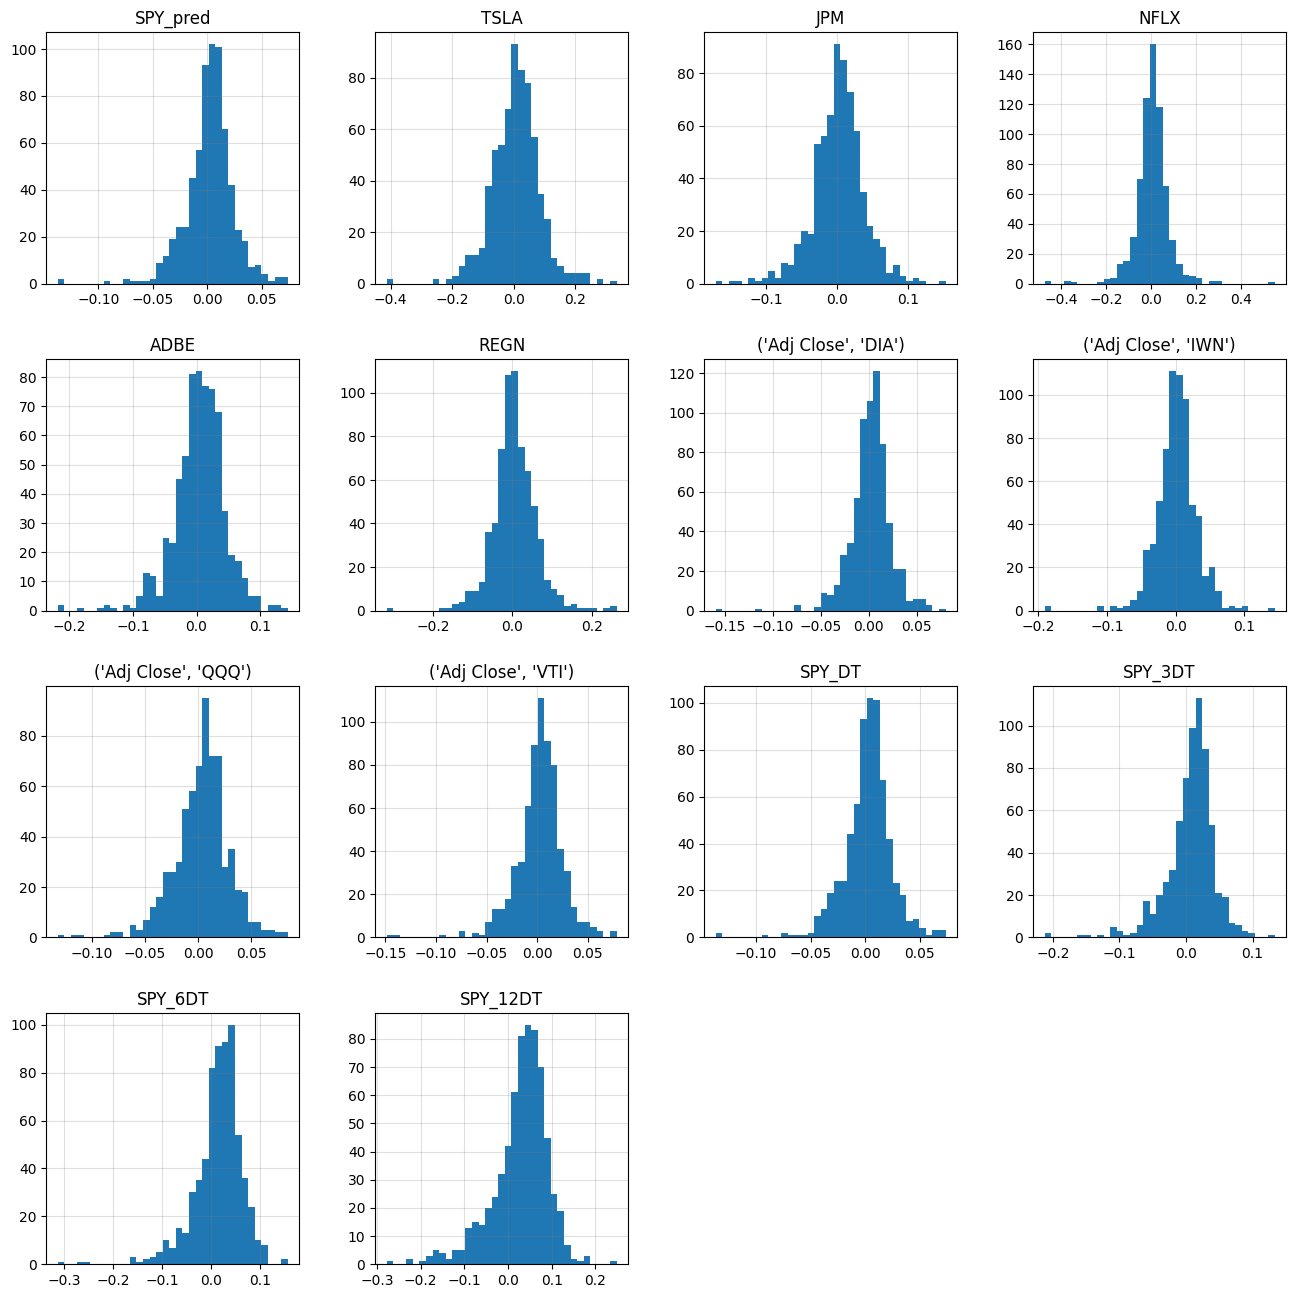

In [ ]:
# create histo
(data.hist(bins = 35, sharex = False, sharey = False,figsize =[16, 16]))
plt.show()

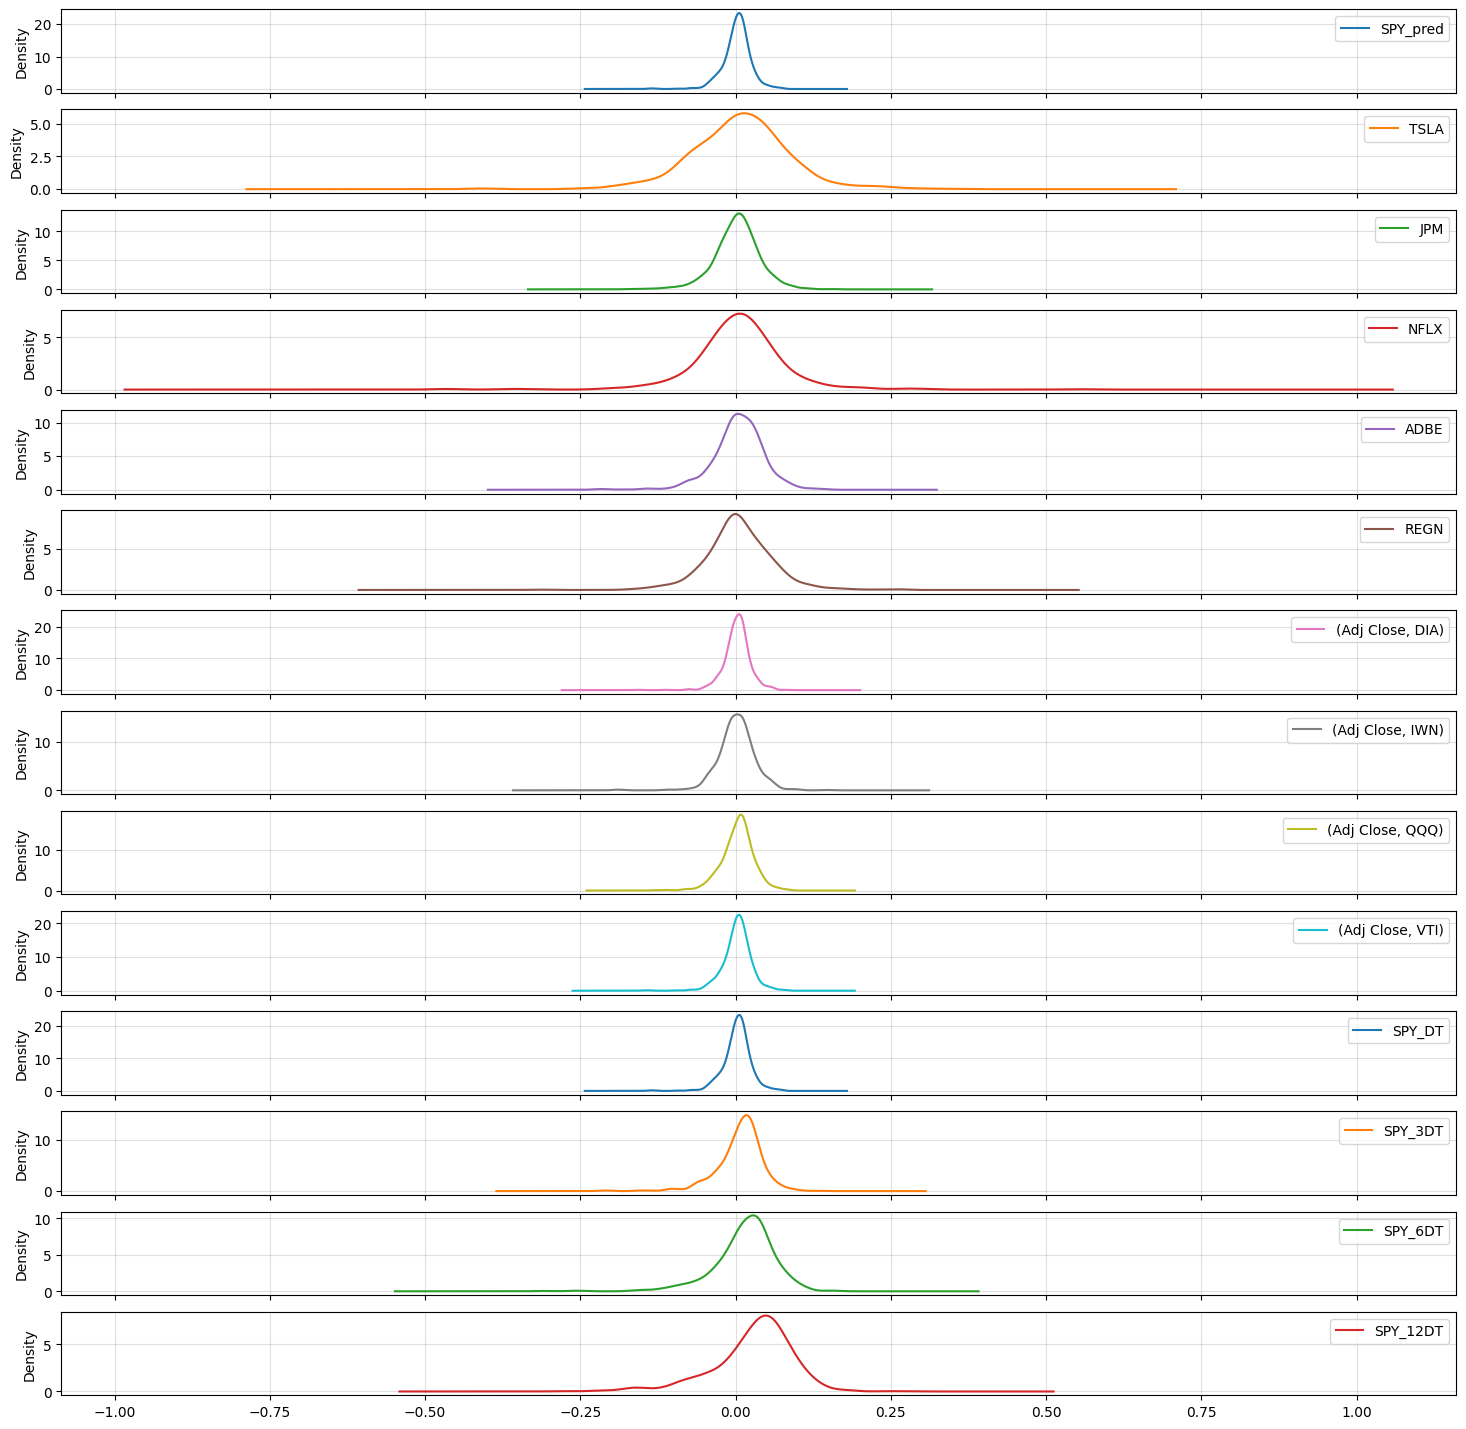

In [ ]:
# for kernel density estimation

(data.plot(kind = "density", subplots = True, sharex = True, legend = True, figsize = [18,18]))
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

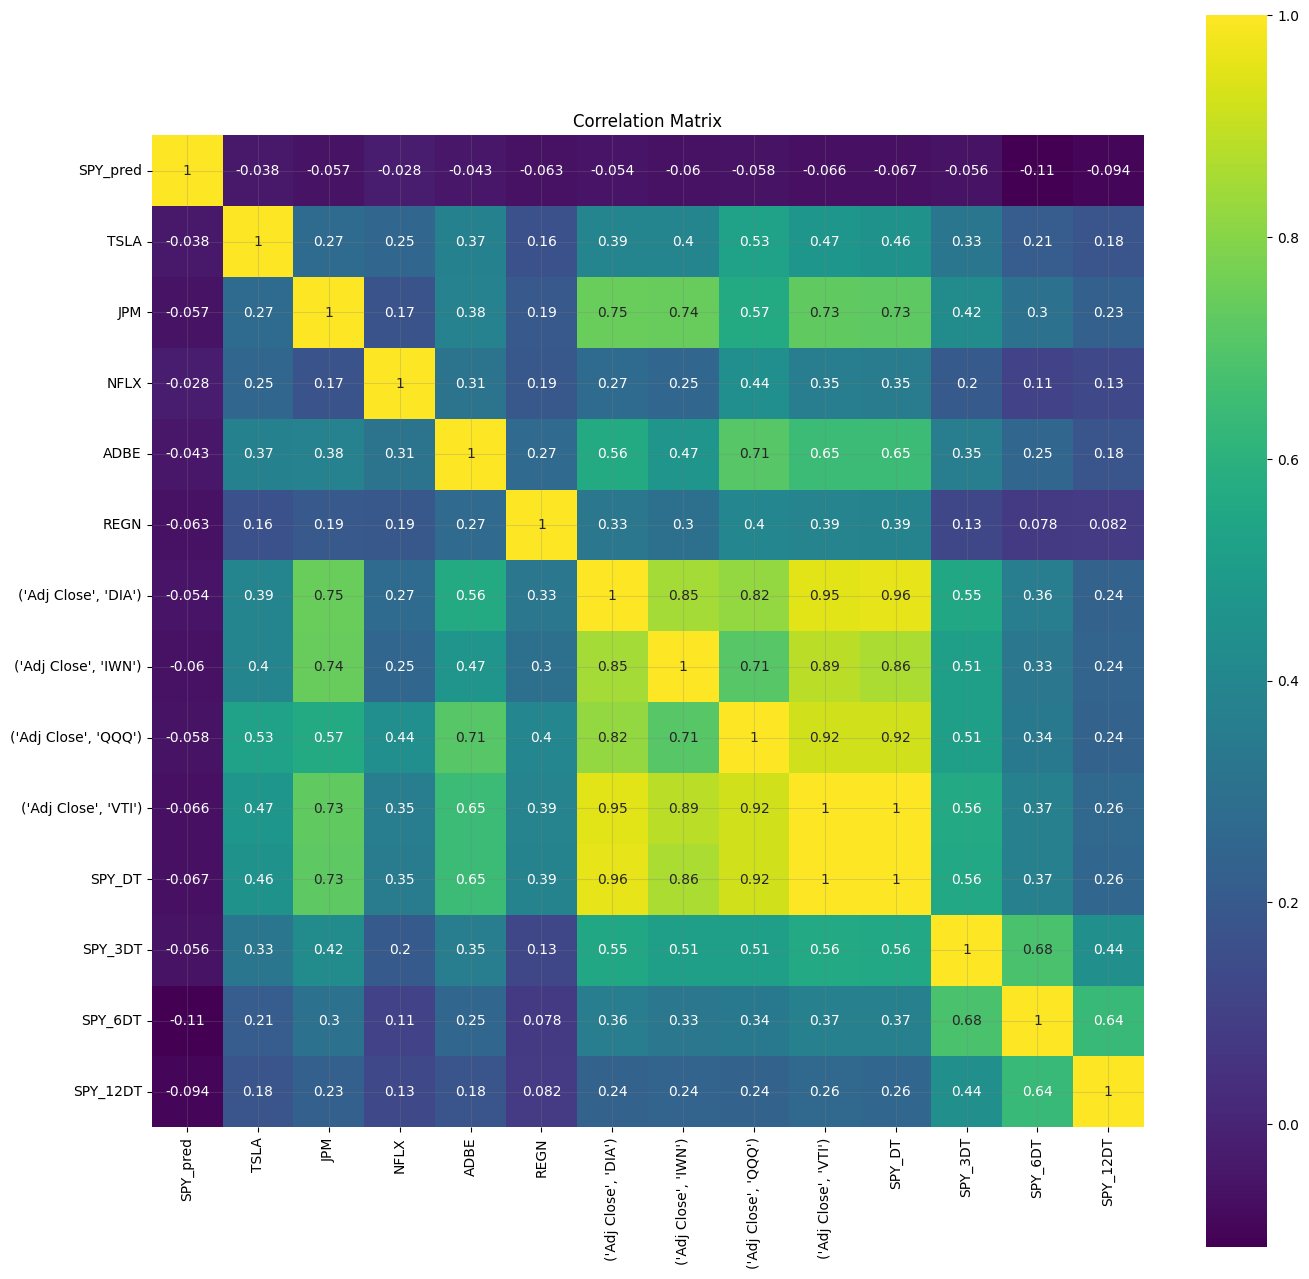

In [ ]:
# create a matrix to see how much correlation there is between our outcome and different predictors
correlation = data.corr()
plt.figure(figsize =[16, 16])
plt.title("Correlation Matrix")
sns.heatmap(correlation,vmax = 1, square = True, cmap = "viridis", annot = True)

# nice! we can see that indexes usually correlate a lot among each other. Note that Adobe and JP Morgan follow their trend, too

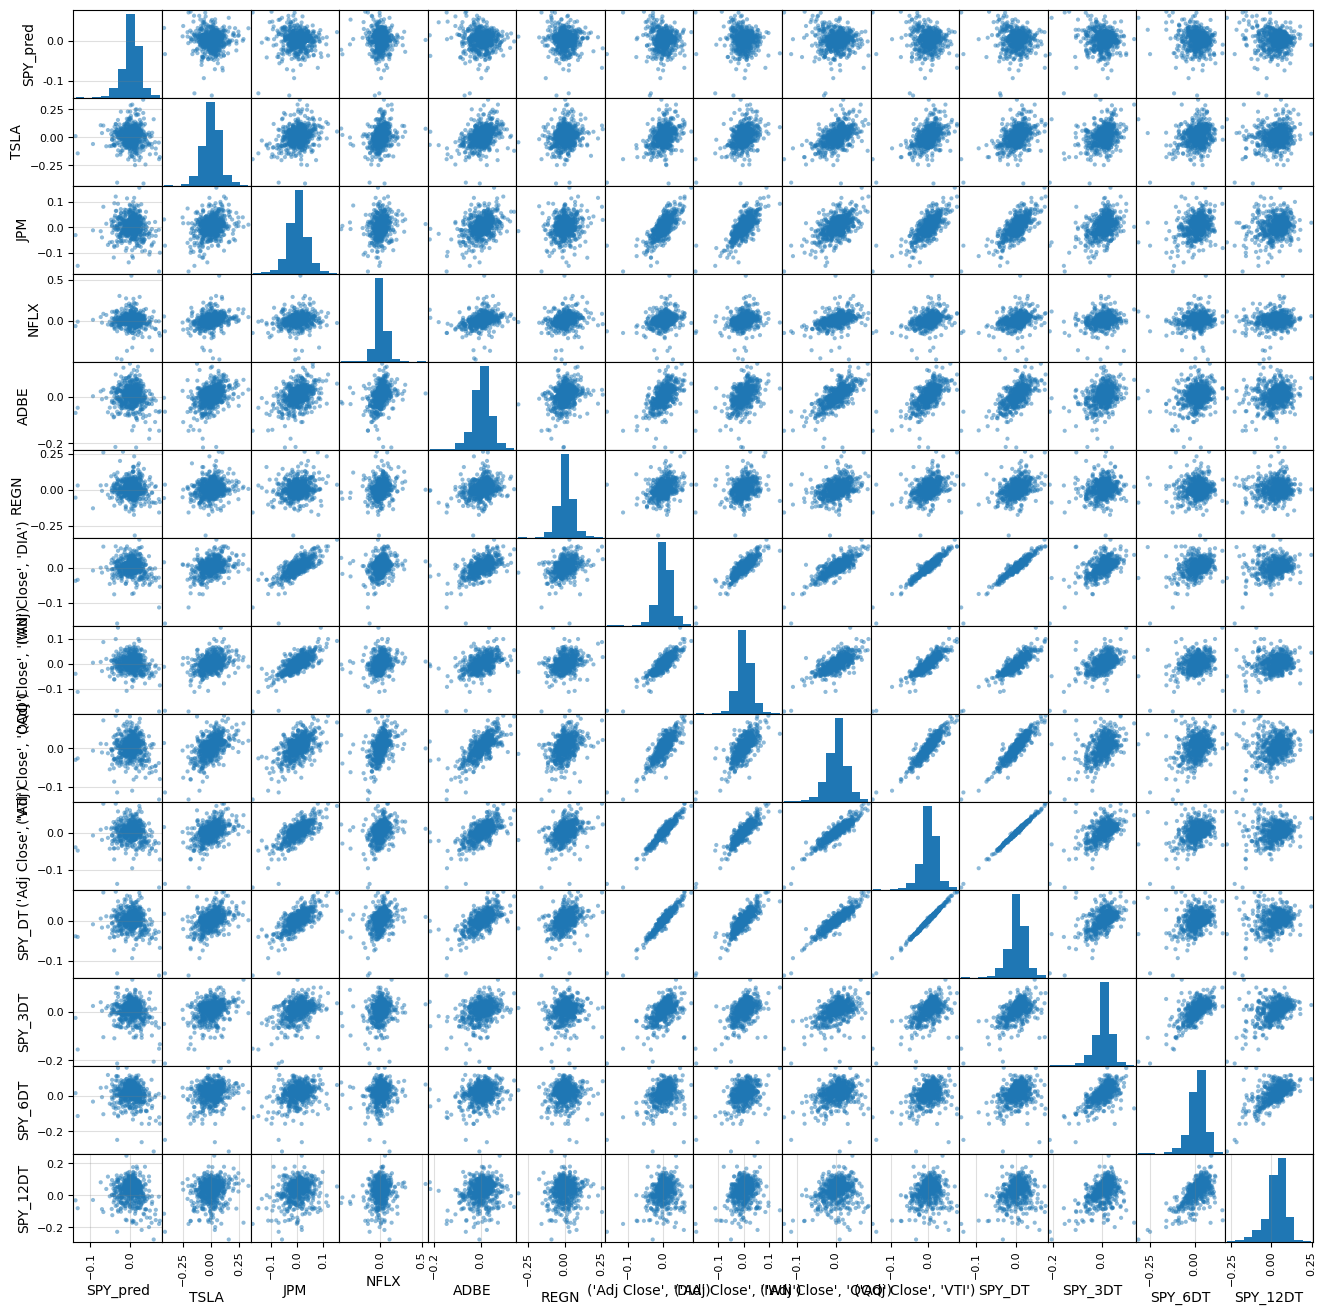

In [ ]:
# same as above but as scatter matrix
scatter_matrix(data, figsize = (16, 16))
plt.show()

In [ ]:
# step 1 - data split in training and testing set
validation_size = 0.20 #this is our testing set
train_size = int(len(X)*(1 - validation_size))
X_train, X_test = (X[0:train_size], X[train_size:len(X)])
Y_train, Y_test = (Y[0:train_size], Y[train_size:len(X)])

# step 4 prep - tenfold cross-validation and evaluation
num_folds = 10
seed = 230926
scoring = "neg_mean_squared_error"

# step 3 - model fitting and comparison of different models
models = []

models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("SVR", SVR()))
models.append(("RFR", RandomForestRegressor()))
models.append(("ETR", ExtraTreesRegressor()))
models.append(("GBR", GradientBoostingRegressor()))
models.append(("ABR", AdaBoostRegressor()))
models.append(("ABR", AdaBoostRegressor()))

In [ ]:
names = []
kfold_results = []
train_results = []
test_results = []

for name, model in models:

    names.append(name)
    kfold = (KFold(n_splits = num_folds, random_state = seed, shuffle = True))
    cv_results = (-1*cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring))
    kfold_results.append(cv_results)
    res = model.fit(X_train, Y_train)

# Evaluating Model on Training Set:
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)

# Evaluating Model on Testing Set:
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

# Printing the Results:
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
                                     cv_results.std(),
                                     train_result,
                                     test_result)
    print(message)

LR: 0.000496 (0.000089) 0.000480 0.000596
LASSO: 0.000495 (0.000095) 0.000494 0.000588
EN: 0.000495 (0.000095) 0.000494 0.000588
CART: 0.000879 (0.000163) 0.000000 0.001322
KNN: 0.000432 (0.000105) 0.000268 0.000655
SVR: 0.001529 (0.000267) 0.001495 0.001496
RFR: 0.000412 (0.000074) 0.000059 0.000592
ETR: 0.000382 (0.000074) 0.000000 0.000590
GBR: 0.000454 (0.000098) 0.000283 0.000585
ABR: 0.000629 (0.000109) 0.000654 0.000818
ABR: 0.000686 (0.000106) 0.000736 0.000852


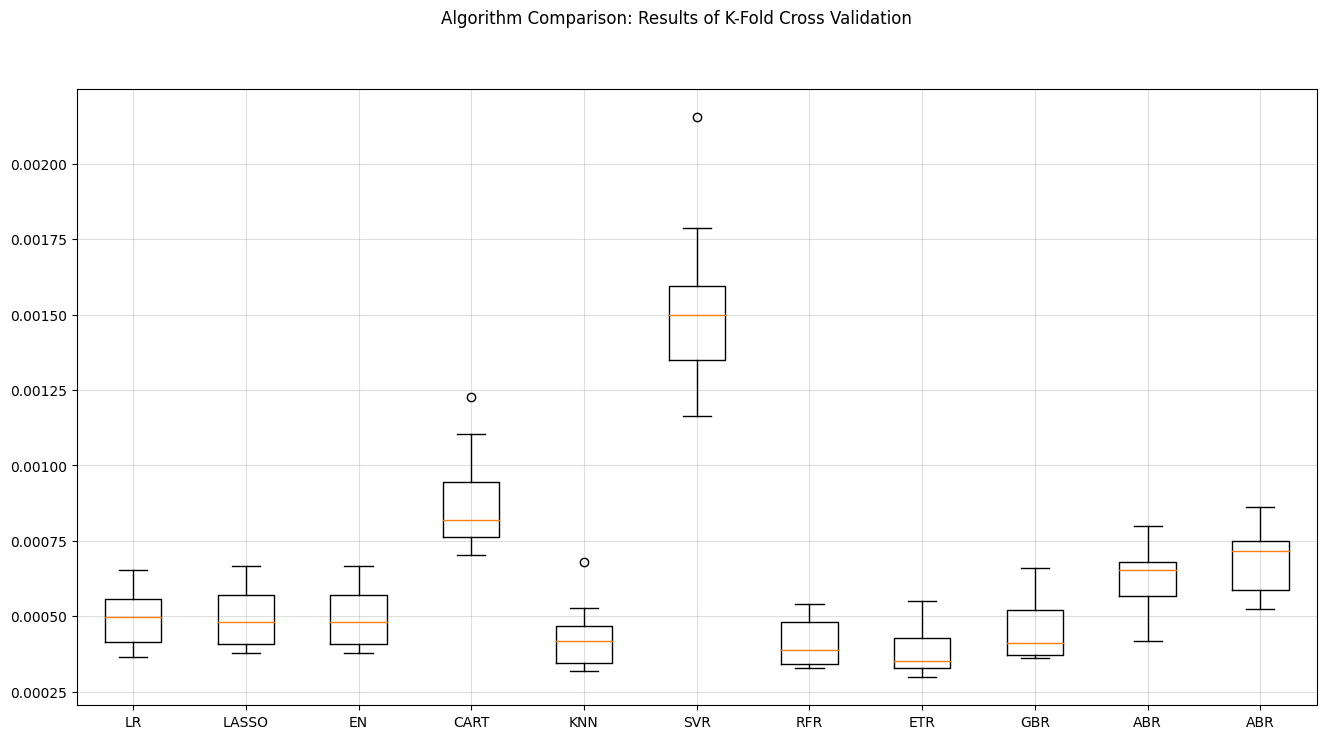

In [ ]:
# box plot for algo comparison. Extra trees regressor gives us the most promising result so far!
fig = plt.figure(figsize = [16, 8])
fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.show()

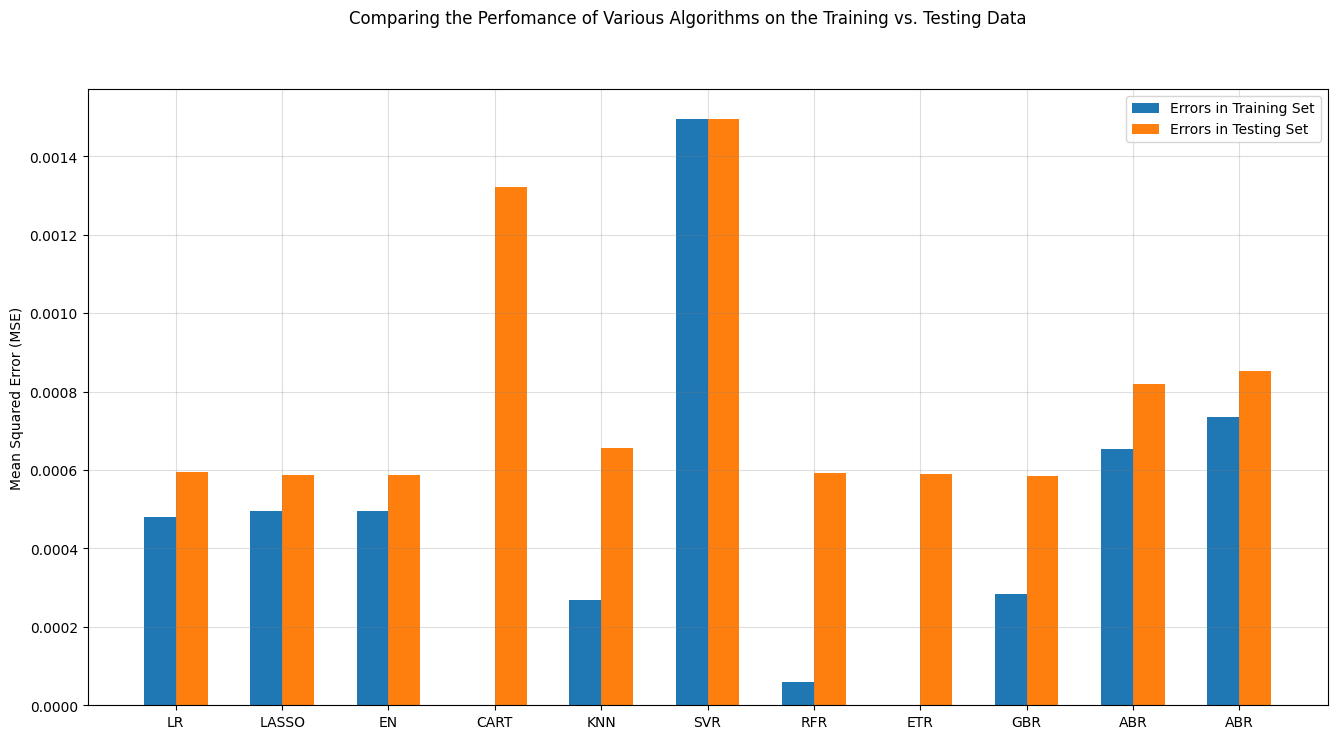

In [ ]:
# Let's plot the errors!
fig = plt.figure(figsize = [16, 8])
ind = np.arange(len(names))
width = 0.30
fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")
ax = fig.add_subplot(111)
(plt.bar(ind - width/2, train_results, width = width, label = "Errors in Training Set"))
(plt.bar(ind + width/2, test_results, width = width, label = "Errors in Testing Set"))
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

Conclusion: after adding more features to our model, the error in testing set part has not changed much, but we have a significantly smaller difference between training and testing error, which actually means this model is more universal and accurate than the previous one.

#MACD and RSI

Done by: Nadia

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

In [ ]:
df4

,Adj Close,MACD_line,MACD_signal_line,MACD_hist,position,b_s
Date,,,,,,
2004-11-01,78.617958,0.000000,0.000000,0.000000,0,NaN
2004-11-02,78.645638,0.000923,0.000492,0.000431,1,1.0
2004-11-03,79.636070,0.046927,0.018077,0.028850,1,0.0
2004-11-04,80.723442,0.124964,0.050364,0.074600,1,0.0
2004-11-05,81.229065,0.194007,0.087226,0.106781,1,0.0
...,...,...,...,...,...,...
2023-10-25,417.549988,-5.301090,-3.752767,-1.548323,0,0.0
2023-10-26,412.549988,-6.464144,-4.091690,-2.372454,0,0.0
2023-10-27,410.679993,-7.497869,-4.517462,-2.980407,0,0.0


In [ ]:
def build_MACD(data,short_MA,long_MA,signal_MA):
    short_ma = data["Adj Close"].ewm(span = short_MA,min_periods = 1).mean()
    long_ma = data["Adj Close"].ewm(span = long_MA,min_periods = 1).mean()
    data["MACD_line"] = short_ma - long_ma
    data["MACD_signal_line"] = data["MACD_line"].ewm(span = signal_MA,min_periods = 1).mean()
    data["MACD_hist"] = data["MACD_line"] - data["MACD_signal_line"]
    data["position"] = np.where(data["MACD_line"] > data["MACD_signal_line"],1,0)
    data["b_s"] = data["position"].diff()
    data = data.fillna(0)
    return data



def build_RSI(data,trading_days,lower_thres,upper_thres,exit_thres):
    gain = data["Adj Close"].diff()
    loss = gain.copy()
    gain[gain<0] = 0
    loss[loss>0] = 0
    average_gain = gain.rolling(window = trading_days).mean()
    average_loss = loss.rolling(window = trading_days).mean()
    data["RS"] = average_gain / abs(average_loss.values)
    RS = []
    for i in range(trading_days,len(data)):
        RS.append((data["RS"][i-1] * (trading_days - 1) + data["RS"][i])/trading_days)
    data["RS"][trading_days: ] = RS
    data["RSI"] = 100 - 100 / (1+data["RS"].values)
    data["RSI_signal"] = np.nan
    for i in range(1,len(data)):
        rsi = data["RSI"].iloc[i]
        rsi_pre = data["RSI"].iloc[i-1]
        if rsi > lower_thres and rsi_pre <= lower_thres:
            # go long
            if data["RSI_signal"].iloc[i-1] != 1:
                data.at[data.index[i],"RSI_signal"] = 1
        elif rsi < upper_thres and rsi_pre >= upper_thres:
            # go short
            if data["RSI_signal"].iloc[i-1] != -1:
                data.at[data.index[i],"RSI_signal"] = -1
        elif (rsi >= exit_thres and rsi_pre < exit_thres) or (rsi <= exit_thres and rsi_pre > exit_thres):
            data.at[data.index[i],"RSI_signal"] = 0
    data["RSI_signal"].ffill(inplace = True)
    data["position"] = data["RSI_signal"].fillna(0)
    data["b_s"] = data["position"].diff()
    data = data.fillna(0)
    return data


In [ ]:
df5_RSI = build_RSI(df5, 14, 30, 70, 50)
df5_RSI['b_s'].value_counts()

 0.0    4486
-1.0     149
 1.0     146
 2.0       2
Name: b_s, dtype: int64

In [ ]:
def RSI_visualize(df):

    # Create a figure and axis for the price chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the price data
    ax.plot(df['Adj Close'], label='Price', color='grey', linewidth=0.5)

    # Plot buy positions (green) and sell positions (red) based on the 'Signal' column
    buy_positions =df[df['b_s']>0]
    sell_positions = df[df['b_s'] <0]

    ax.scatter(buy_positions.index, buy_positions['Adj Close'], marker='^', color='g', label='Buy', s=10)
    ax.scatter(sell_positions.index, sell_positions['Adj Close'], marker='v', color='r', label='Sell', s=10)

    # Add labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('RSI Buy and Sell Positions')
    ax.legend()

RSI_visualize (df5_RSI)

SyntaxError: ignored

In [ ]:
df4_macd = build_MACD(df4, 10, 30, 15)
df4_macd

,Adj Close,MACD_line,MACD_signal_line,MACD_hist,position,b_s
Date,,,,,,
2004-11-01,78.617958,0.000000,0.000000,0.000000,0,0.0
2004-11-02,78.645638,0.000923,0.000492,0.000431,1,1.0
2004-11-03,79.636070,0.046927,0.018077,0.028850,1,0.0
2004-11-04,80.723442,0.124964,0.050364,0.074600,1,0.0
2004-11-05,81.229065,0.194007,0.087226,0.106781,1,0.0
...,...,...,...,...,...,...
2023-10-25,417.549988,-5.301090,-3.752767,-1.548323,0,0.0
2023-10-26,412.549988,-6.464144,-4.091690,-2.372454,0,0.0
2023-10-27,410.679993,-7.497869,-4.517462,-2.980407,0,0.0


In [ ]:
df4_macd['b_s'].value_counts()

 0.0    4425
 1.0     179
-1.0     179
Name: b_s, dtype: int64

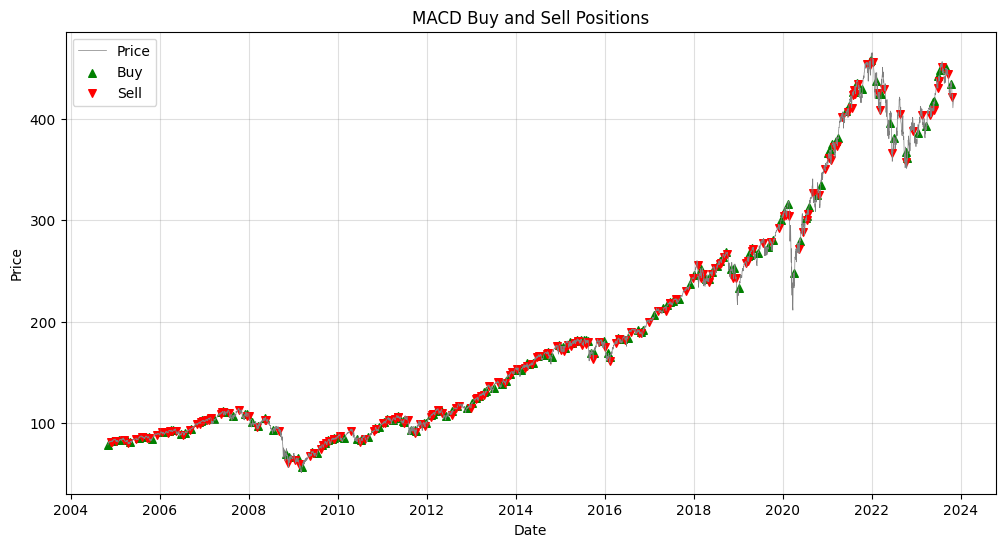

In [ ]:
def MACD_visualize(df):

    # Create a figure and axis for the price chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the price data
    ax.plot(df['Adj Close'], label='Price', color='grey', linewidth=0.5)

    # Plot buy positions (green) and sell positions (red) based on the 'Signal' column
    buy_positions =df[df['b_s'] >0]
    sell_positions = df[df['b_s'] <0]

    ax.scatter(buy_positions.index, buy_positions['Adj Close'], marker='^', color='g', label='Buy', s=30)
    ax.scatter(sell_positions.index, sell_positions['Adj Close'], marker='v', color='r', label='Sell', s=30)

    # Add labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('MACD Buy and Sell Positions')
    ax.legend()

MACD_visualize (df4_macd)



RSI + MACD combined signals

In [ ]:
rsi_macd = pd.concat([df4_macd[['Adj Close', 'b_s']], df5_RSI[['b_s']]], axis=1)
rsi_macd.columns = ['Adj Close', 'position_macd', 'position_rsi']
rsi_macd

,Adj Close,position_macd,position_rsi
Date,,,
2004-11-01,78.617958,0.0,0.0
2004-11-02,78.645638,1.0,0.0
2004-11-03,79.636070,0.0,0.0
2004-11-04,80.723442,0.0,0.0
2004-11-05,81.229065,0.0,0.0
...,...,...,...
2023-10-25,417.549988,0.0,0.0
2023-10-26,412.549988,0.0,0.0
2023-10-27,410.679993,0.0,0.0


In [ ]:
rsi_macd['position'] = np.where(rsi_macd['position_macd']*rsi_macd['position_rsi']>0, rsi_macd['position_macd'], 0)
rsi_macd['b_s'] = rsi_macd['position'].diff()
rsi_macd['b_s'].fillna(0, inplace=True)
rsi_macd['b_s'].value_counts()

 0.0    4759
-1.0      12
 1.0      12
Name: b_s, dtype: int64

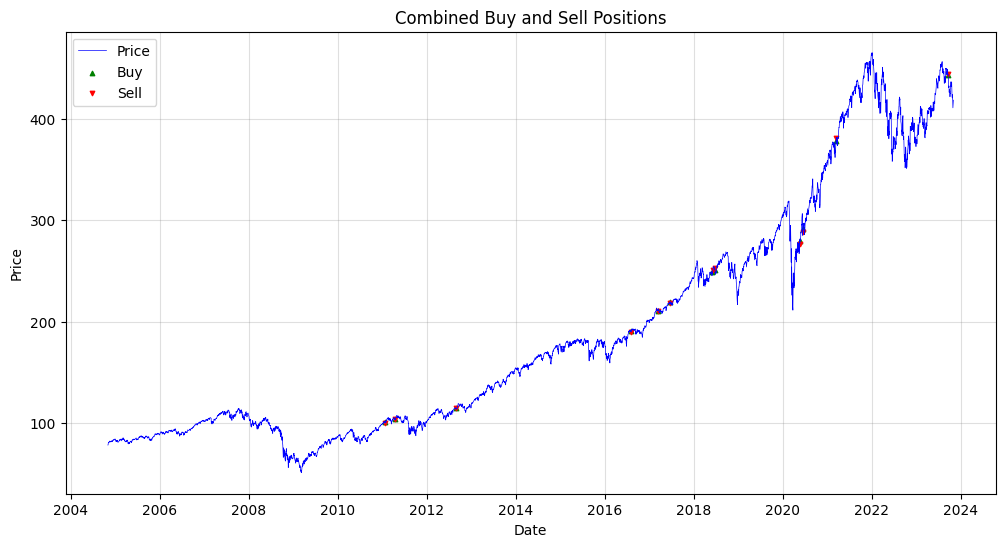

In [ ]:
# Create a figure and axis for the price chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the price data
ax.plot(rsi_macd['Adj Close'], label='Price', color='b', linewidth=0.5)

# Plot buy positions (green) and sell positions (red) based on the 'Signal' column
buy_positions =rsi_macd[rsi_macd['b_s'] > 0]
sell_positions = rsi_macd[rsi_macd['b_s'] < 0]

ax.scatter(buy_positions.index, buy_positions['Adj Close'], marker='^', color='g', label='Buy', s=10)
ax.scatter(sell_positions.index, sell_positions['Adj Close'], marker='v', color='r', label='Sell', s=10)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Combined Buy and Sell Positions')
ax.legend()

In [ ]:
test_data

,Adj Close,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_16,lag_17,lag_18,lag_19,lag_20,Prediction,Strategy,CUMULATIVE STRATEGY,CUMULATIVE RETURN,MAX_GROSS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,216.986649,-0.044050,0.002123,-0.051960,0.052585,-0.115887,0.082028,-0.100569,-0.049977,0.050451,...,-0.045952,-0.003685,-0.030771,-0.033728,-0.010352,1.0,-0.044050,0.956906,0.956906,0.956906
2020-03-23,211.438644,-0.025901,-0.044050,0.002123,-0.051960,0.052585,-0.115887,0.082028,-0.100569,-0.049977,...,-0.004210,-0.045952,-0.003685,-0.030771,-0.033728,1.0,-0.025901,0.932439,0.932439,0.956906
2020-03-24,230.595734,0.086731,-0.025901,-0.044050,0.002123,-0.051960,0.052585,-0.115887,0.082028,-0.100569,...,0.042395,-0.004210,-0.045952,-0.003685,-0.030771,1.0,0.086731,1.016922,1.016922,1.016922
2020-03-25,234.047806,0.014859,0.086731,-0.025901,-0.044050,0.002123,-0.051960,0.052585,-0.115887,0.082028,...,-0.029050,0.042395,-0.004210,-0.045952,-0.003685,1.0,0.014859,1.032145,1.032145,1.032145
2020-03-26,247.713776,0.056749,0.014859,0.086731,-0.025901,-0.044050,0.002123,-0.051960,0.052585,-0.115887,...,0.041174,-0.029050,0.042395,-0.004210,-0.045952,1.0,0.056749,1.092412,1.092412,1.092412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,-0.014456,0.007511,-0.001735,-0.012364,-0.008825,-0.013415,-0.000046,0.010466,-0.004993,...,-0.013476,-0.000398,-0.002430,0.005781,0.000399,1.0,-0.014456,1.841385,1.841385,2.050301
2023-10-26,412.549988,-0.012047,-0.014456,0.007511,-0.001735,-0.012364,-0.008825,-0.013415,-0.000046,0.010466,...,0.007256,-0.013476,-0.000398,-0.002430,0.005781,1.0,-0.012047,1.819336,1.819336,2.050301
2023-10-27,410.679993,-0.004543,-0.012047,-0.014456,0.007511,-0.001735,-0.012364,-0.008825,-0.013415,-0.000046,...,-0.000377,0.007256,-0.013476,-0.000398,-0.002430,1.0,-0.004543,1.811089,1.811089,2.050301


In [ ]:
Sharpe_SL2 = annualized_sharpe_ratio(test_data["Strategy"])
Sharpe_SL2

0.10147537685490617

In [ ]:
capital = 1e5
SL2_Cash = CalculateCashReturn(test_data,capital)
SL2_Cash

184425.19984722306

In [ ]:
CalculateCAGR(test_data, SL2_Cash)

18.44

<Axes: xlabel='Date'>

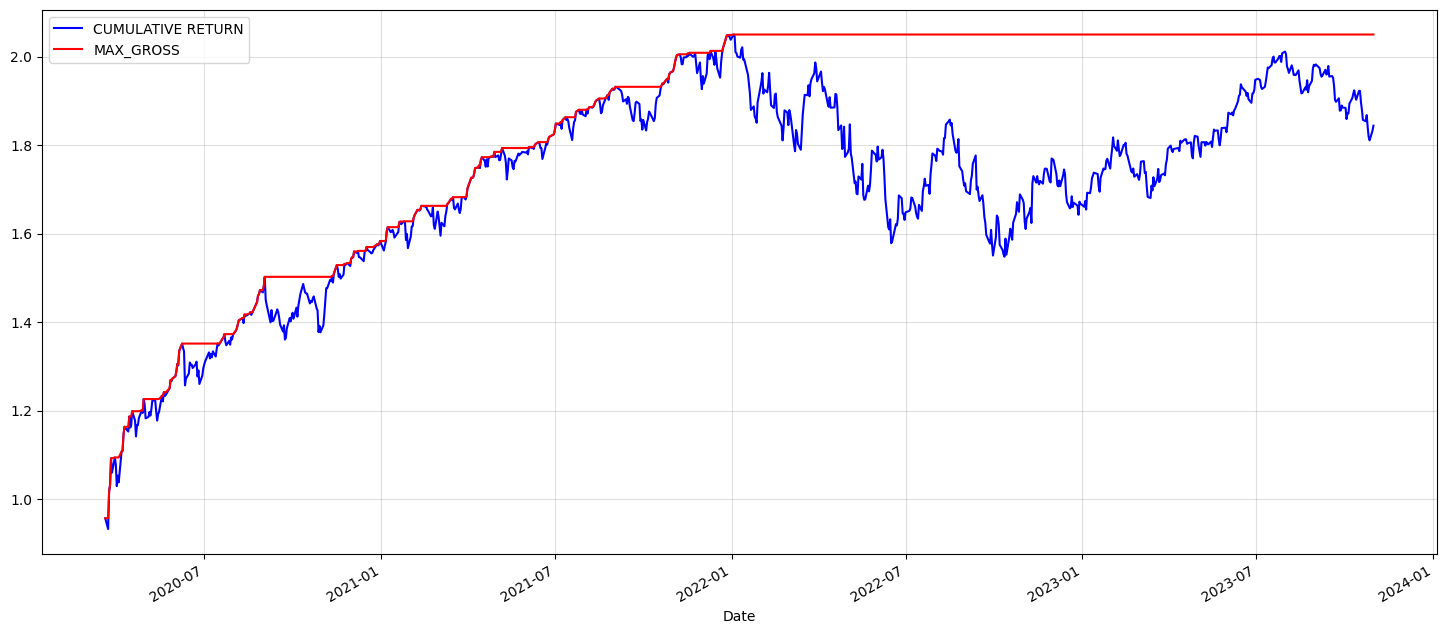

In [ ]:
test_data['CUMULATIVE RETURN'] = \
    test_data['Strategy'].cumsum().apply(np.exp)

test_data['MAX_GROSS'] = \
    test_data['CUMULATIVE RETURN'].cummax()


(
    test_data
    [['CUMULATIVE RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8],
          color=['blue', 'red']
         )
)

In [ ]:
drawdown_SL2 = (test_data['CUMULATIVE RETURN']/test_data['MAX_GROSS']) - 1

-drawdown_SL2.min()

0.24496393409480133

In [ ]:
periods_SL2 =\
(
    drawdown_SL2[drawdown_SL2 == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_SL2[drawdown_SL2 == 0].index[   : -1].to_pydatetime()
)
periods_SL2.max()

datetime.timedelta(days=70)

## Build, execute, and backtest a machine learning strategy using S&P500 ETF with Dow Jones ETF, Nasdaq ETF and Russell 2000 ETF.

Done by: Khor Shuo En

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

In [ ]:
df6 =\
    pdr \
        .get_data_yahoo(("SPY","DIA","QQQ","IWM"),
                        start = "2004-11-1",
                        end = "2023-11-1")

df6 = pd.DataFrame(df6["Adj Close"])
df6

[*********************100%%**********************]  4 of 4 completed


,DIA,IWM,QQQ,SPY
Date,,,,
2004-11-01,64.949425,45.275135,31.722666,78.617928
2004-11-02,64.833305,45.097298,31.825434,78.645668
2004-11-03,65.594322,45.824116,32.039543,79.636078
2004-11-04,66.632614,46.384689,32.219395,80.723465
2004-11-05,67.213058,46.593445,32.510586,81.229042
...,...,...,...,...
2023-10-25,329.682739,163.720001,350.339996,417.549988
2023-10-26,327.157837,164.139999,343.660004,412.549988
2023-10-27,323.535187,162.210007,345.309998,410.679993


In [ ]:
missing_values =\
(
    df6
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values

DIA    0.0
IWM    0.0
QQQ    0.0
SPY    0.0
dtype: float64

In [ ]:
Daily_Linear_Return =\
(
    df6
    .pct_change(1)
)

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

scaled_df6 =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

In [ ]:
prop =\
    int(len(scaled_df6) * 0.80)

X_Train = df6[    : prop] # First 80% of the data for PCA
X_Test  = df6[prop:     ] # Remaining 20% of the data for backtesting

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [ ]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

NumEigenValues = 5

pca.components_

array([[ 0.54179654,  0.34456599,  0.46355424,  0.61061302],
       [ 0.26169763, -0.69519834,  0.60057591, -0.29584151],
       [-0.30225411,  0.58616389,  0.5672614 , -0.49322292],
       [-0.73933302, -0.23320687,  0.32037563,  0.54439021]])

In [ ]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights

In [ ]:
weights = PCWeights()

NumComponents = 4

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = df6.columns)
)

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

np.sqrt(pca.explained_variance_)

array([96.777781  ,  5.56799302,  3.22531967,  2.98120771])

In [ ]:
print(eigen_portfolios)

print("The sum of eigen portfolio is: ", eigen_portfolios.iloc[0].sum())

                  DIA       IWM       QQQ       SPY
Portfolio 0  0.276352  0.175751  0.236443  0.311453
Portfolio 1 -2.032345  5.398915 -4.664076  2.297507
Portfolio 2 -0.844407  1.637566  1.584758 -1.377917
Portfolio 3  6.860028  2.163850 -2.972660 -5.051218
The sum of eigen portfolio is:  0.9999999999999999


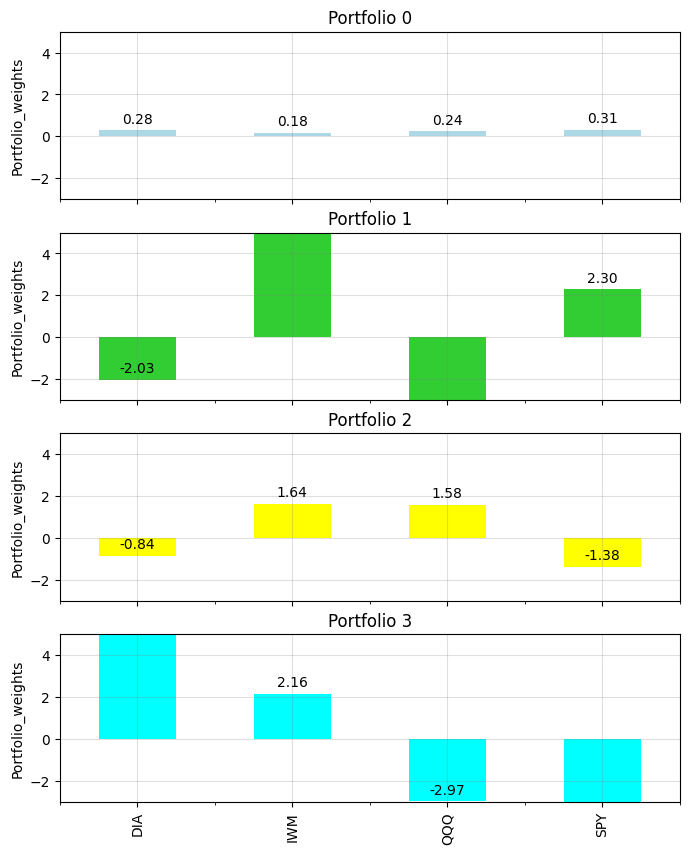

In [ ]:
(eigen_portfolios
    .T
    .plot
    .bar(subplots=True,
         layout=(int(NumComponents), 1),
         legend=False,
         sharey=True,
         figsize=[8, 10],
         ylim=[-3, 5],
         color=['lightblue', 'limegreen', 'yellow', 'cyan', 'orange']  # Add your custom bar colors
        )
)

# Adding y-axis labels to each subplot
for i, ax in enumerate(plt.gcf().axes):
    ax.set_ylabel('Portfolio_weights')

# Add y-axis values on top of each bar
for ax in plt.gcf().axes:
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Format the value as desired
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for the y-value position
                    textcoords='offset points',
                    ha='center',
                    va='bottom'
                   )

# Show the plot
plt.show()

In [ ]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [ ]:
stock_tickers =\
(
 df6
 .columns
 .values
)

stock_tickers

array(['DIA', 'IWM', 'QQQ', 'SPY'], dtype=object)

In [ ]:
def recommend_optimal_portfolio():

    n_portfolios = len(pca.components_)

    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    highest_sharpe = 0

    stock_tickers =\
    (df6
     .columns
     .values)

    n_tickers = len(stock_tickers)

    PCs = pca.components_

    for i in range(n_portfolios):

        pc_w = PCs[i] / sum(PCs[i])

        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        sharpe_metric = np.nan_to_num(sharpe_metric)

    highest_sharpe = np.argmax(sharpe_metric)



    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )
    results.replace([np.inf, -np.inf], np.nan, inplace=True)
    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    print(results.head(10)
         )

In [ ]:
recommend_optimal_portfolio()

     Return       Vol    Sharpe
2  0.191460  0.181166  1.056822
0  0.144972  0.153257  0.945943
1  0.204186  0.325538  0.627225
3 -0.064192  0.387963 -0.165460


In [ ]:
def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

Our PCA-based Portfolio:
Return = 30.36%
Volatility = 22.89%
Sharpe = 1.33


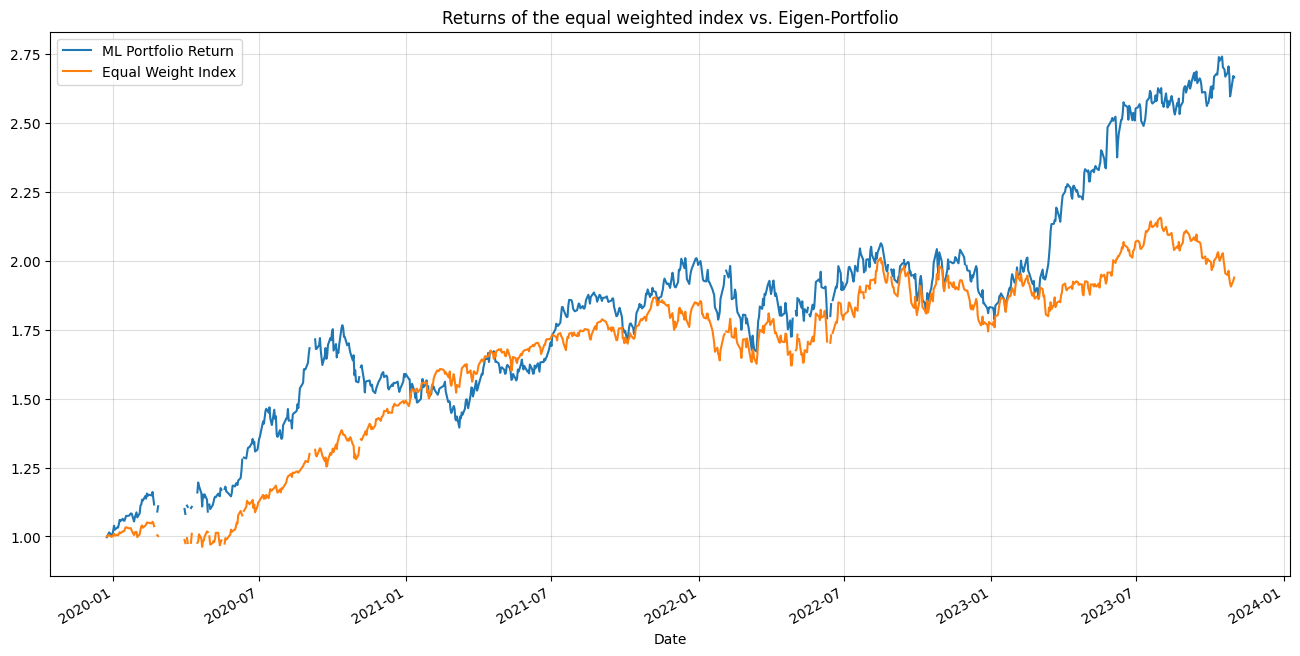

In [ ]:
backtest_PCA_porfolios(eigen = weights[2]
                      )

# PART 2

#Momentum strategy (Ichimoku + CCI)

Done by: Nadia

Optimize by: Xuanheng and Durga

Compiled by: Sugintha

In [ ]:
df7

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-01,113.559998,113.839996,113.199997,113.510002,78.617958,36720900
2004-11-02,113.669998,114.570000,113.220001,113.550003,78.645638,56210000
2004-11-03,115.029999,115.360001,114.239998,114.980003,79.636070,76960200
2004-11-04,114.779999,116.669998,114.680000,116.550003,80.723442,55350300
2004-11-05,117.050003,117.639999,116.489998,117.279999,81.229065,63287200
...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700


In [ ]:
def get_CCI(stock, nCCI=20):

    CCI = pd.DataFrame()
    CCI["TP"] =\
    (
        stock[['High', 'Low', 'Close']]
        .mean(axis = 1)
    )

    CCI['SMA_TP'] = \
    (
        CCI['TP']
        .rolling(nCCI)
        .mean()
    )

    # Calculate Mean Deviation (MD)
    CCI['MD'] = CCI['TP'] - CCI['SMA_TP'].shift(1)
    CCI['MD'] = CCI['MD'].abs()
    CCI['MD'] = CCI['MD'].rolling(window=nCCI).mean()

    CCI['CCI'] = \
    (
        (CCI['TP'] - CCI['SMA_TP']) / \
        (0.015 * CCI['MD'])
    )

    return CCI

df7_CCI = get_CCI(df7)
df7_CCI

,TP,SMA_TP,MD,CCI
Date,,,,
2004-11-01,113.516665,NaN,NaN,NaN
2004-11-02,113.780001,NaN,NaN,NaN
2004-11-03,114.860001,NaN,NaN,NaN
2004-11-04,115.966667,NaN,NaN,NaN
2004-11-05,117.136665,NaN,NaN,NaN
...,...,...,...,...
2023-10-25,418.829997,428.233001,7.204559,-87.009765
2023-10-26,413.826660,427.530334,7.197917,-126.922590
2023-10-27,411.496663,426.684501,7.355826,-137.649052


In [ ]:
def get_ICHI(stock, nTS=9, nKS=26, nSS=52):
    ICHI = pd.DataFrame()
    # Calculate Ichimoku Cloud values
    ichimoku = IchimokuIndicator(high=stock['High'], low=stock['Low'], window1=9, window2=26, window3=52)
    ICHI['TS'] = ichimoku.ichimoku_a()
    ICHI['KS'] = ichimoku.ichimoku_b()
    ICHI['SSA'] = ichimoku.ichimoku_base_line()
    ICHI['SSB'] = ichimoku.ichimoku_conversion_line()
    ICHI['LS'] = stock['Close'].shift(-nKS)

    return ICHI

df7_ICHI = get_ICHI(df7)
df7_ICHI

,TS,KS,SSA,SSB,LS
Date,,,,,
2004-11-01,NaN,113.519997,NaN,NaN,118.790001
2004-11-02,NaN,113.884998,NaN,NaN,119.209999
2004-11-03,NaN,114.279999,NaN,NaN,119.330002
2004-11-04,NaN,114.934998,NaN,NaN,120.370003
2004-11-05,NaN,115.419998,NaN,NaN,120.790001
...,...,...,...,...,...
2023-10-25,429.154999,435.345001,430.729996,427.580002,NaN
2023-10-26,424.870010,432.635010,424.870010,424.870010,NaN
2023-10-27,423.675003,431.440002,423.675003,423.675003,NaN


In [ ]:
mmt = pd.concat([df7_CCI, df7_ICHI], axis = 1)
mmt.index = pd.to_datetime(mmt.index)
mmt

,TP,SMA_TP,MD,CCI,TS,KS,SSA,SSB,LS
Date,,,,,,,,,
2004-11-01,113.516665,NaN,NaN,NaN,NaN,113.519997,NaN,NaN,118.790001
2004-11-02,113.780001,NaN,NaN,NaN,NaN,113.884998,NaN,NaN,119.209999
2004-11-03,114.860001,NaN,NaN,NaN,NaN,114.279999,NaN,NaN,119.330002
2004-11-04,115.966667,NaN,NaN,NaN,NaN,114.934998,NaN,NaN,120.370003
2004-11-05,117.136665,NaN,NaN,NaN,NaN,115.419998,NaN,NaN,120.790001
...,...,...,...,...,...,...,...,...,...
2023-10-25,418.829997,428.233001,7.204559,-87.009765,429.154999,435.345001,430.729996,427.580002,NaN
2023-10-26,413.826660,427.530334,7.197917,-126.922590,424.870010,432.635010,424.870010,424.870010,NaN
2023-10-27,411.496663,426.684501,7.355826,-137.649052,423.675003,431.440002,423.675003,423.675003,NaN


In [ ]:
def sig_ICHI_CCI(stock, nTS=9, nKS=26, nSS=52, nCCI = 20):
    outcome = stock[['Close']]
    INFO =  pd\
            .concat([get_ICHI(stock, nTS, nKS, nSS), \
                    get_CCI(stock, 20)], axis = 1)

    outcome = pd\
            .concat([outcome, \
                    INFO[['SSA', 'SSB', 'CCI']]], axis = 1)
    outcome['SSA_L'] = outcome['SSA'].shift(nKS)
    outcome['SSB_L'] = outcome['SSB'].shift(nKS)
    outcome["return"] = np.log(outcome["Close"] / outcome["Close"].shift(1))
    outcome["bias"] = 0
    condition = (outcome['Close'] > outcome['SSA_L']) & (outcome['Close'] > outcome['SSB_L']) & (outcome["CCI"] >= 100)
    outcome.loc[condition, 'bias'] = 1
    condition = (outcome['Close'] < outcome['SSA_L']) & (outcome['Close'] < outcome['SSB_L']) & (outcome["CCI"] <= -100)
    outcome.loc[condition, 'bias'] = -1
    # once there is a bias, a trade would result in the NEXT day's return
    outcome["Strategy"] = outcome["bias"].shift(1)
    outcome.dropna(inplace = True)
    outcome["Strategy"] = outcome["Strategy"] * outcome["return"]
    outcome["total"] = \
        outcome["Strategy"] \
        .cumsum() \
        .apply(np.exp)

    INFO_list = ['Close', 'SSA_L', 'SSB_L', 'CCI', 'return', 'bias', 'Strategy', 'total']
    outcome = outcome[INFO_list]

    return outcome

mmt = sig_ICHI_CCI(df7)
mmt

,Close,SSA_L,SSB_L,CCI,return,bias,Strategy,total
Date,,,,,,,,
2005-01-13,117.620003,116.669998,118.810001,-92.502137,-0.008044,0,-0.000000,1.000000
2005-01-14,118.239998,116.680000,118.810001,-75.491654,0.005257,0,0.000000,1.000000
2005-01-18,119.470001,117.189999,118.810001,-31.987434,0.010349,0,0.000000,1.000000
2005-01-19,118.220001,117.410000,118.889999,-47.050735,-0.010518,0,-0.000000,1.000000
2005-01-20,117.500000,118.445000,119.065002,-86.762181,-0.006109,0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,443.340012,445.509995,-87.009765,-0.014456,0,-0.000000,0.779519
2023-10-26,412.549988,443.340012,444.754990,-126.922590,-0.012047,-1,-0.000000,0.779519
2023-10-27,410.679993,442.450012,441.154999,-137.649052,-0.004543,-1,0.004543,0.783069


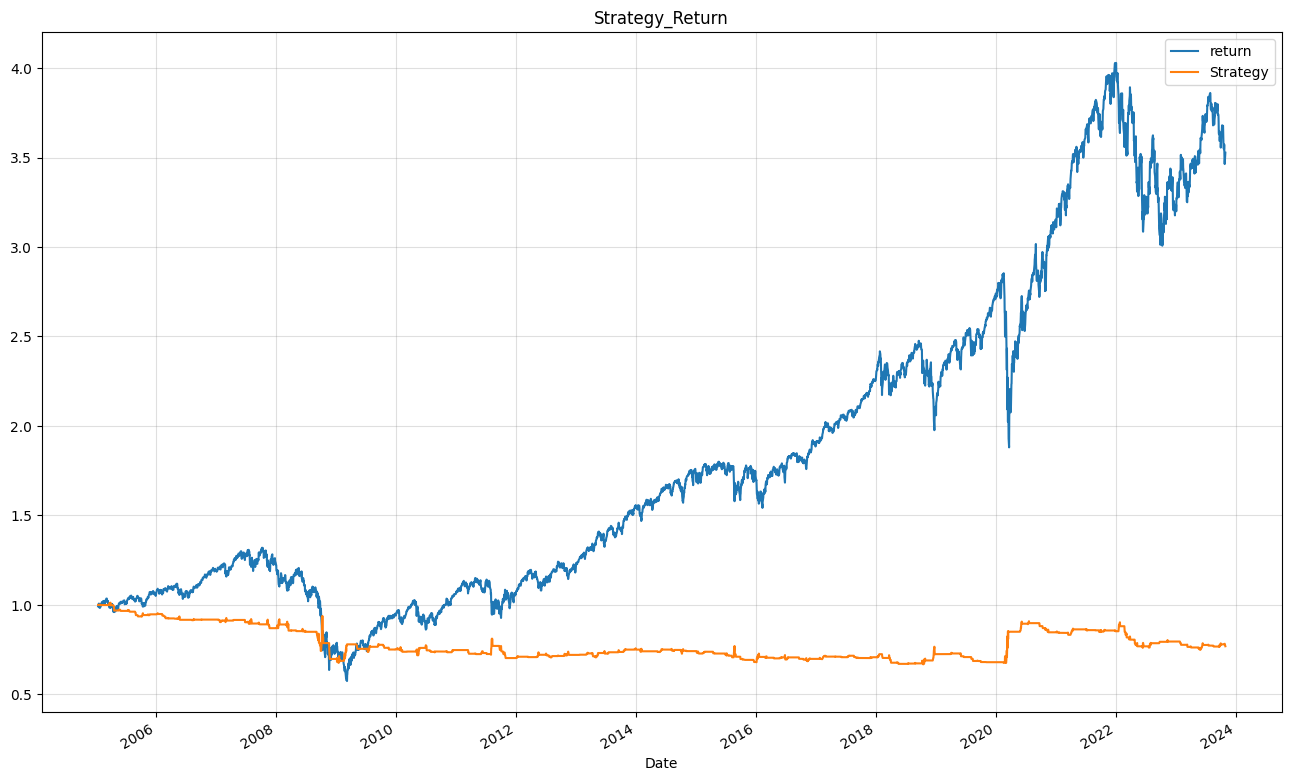

In [ ]:
def plott(signals, Title = 'Strategy_Return'):

    signals[["return", "Strategy"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10), title=Title)
    return

plott(mmt)

In [ ]:
mmt


,Close,SSA_L,SSB_L,CCI,return,bias,Strategy,total
Date,,,,,,,,
2005-01-13,117.620003,116.669998,118.810001,-92.502137,-0.008044,0,-0.000000,1.000000
2005-01-14,118.239998,116.680000,118.810001,-75.491654,0.005257,0,0.000000,1.000000
2005-01-18,119.470001,117.189999,118.810001,-31.987434,0.010349,0,0.000000,1.000000
2005-01-19,118.220001,117.410000,118.889999,-47.050735,-0.010518,0,-0.000000,1.000000
2005-01-20,117.500000,118.445000,119.065002,-86.762181,-0.006109,0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...
2023-10-25,417.549988,443.340012,445.509995,-87.009765,-0.014456,0,-0.000000,0.779519
2023-10-26,412.549988,443.340012,444.754990,-126.922590,-0.012047,-1,-0.000000,0.779519
2023-10-27,410.679993,442.450012,441.154999,-137.649052,-0.004543,-1,0.004543,0.783069


In [ ]:
Sharpe_MS = annualized_sharpe_ratio(mmt["Strategy"])
Sharpe_MS

-0.0370489377588418

In [ ]:
capital = 1e5
MS_Cash = CalculateCashReturn(mmt,capital)
MS_Cash

76898.76831767165

In [ ]:
CalculateCAGR(mmt, MS_Cash)

-1.39

<Axes: xlabel='Date'>

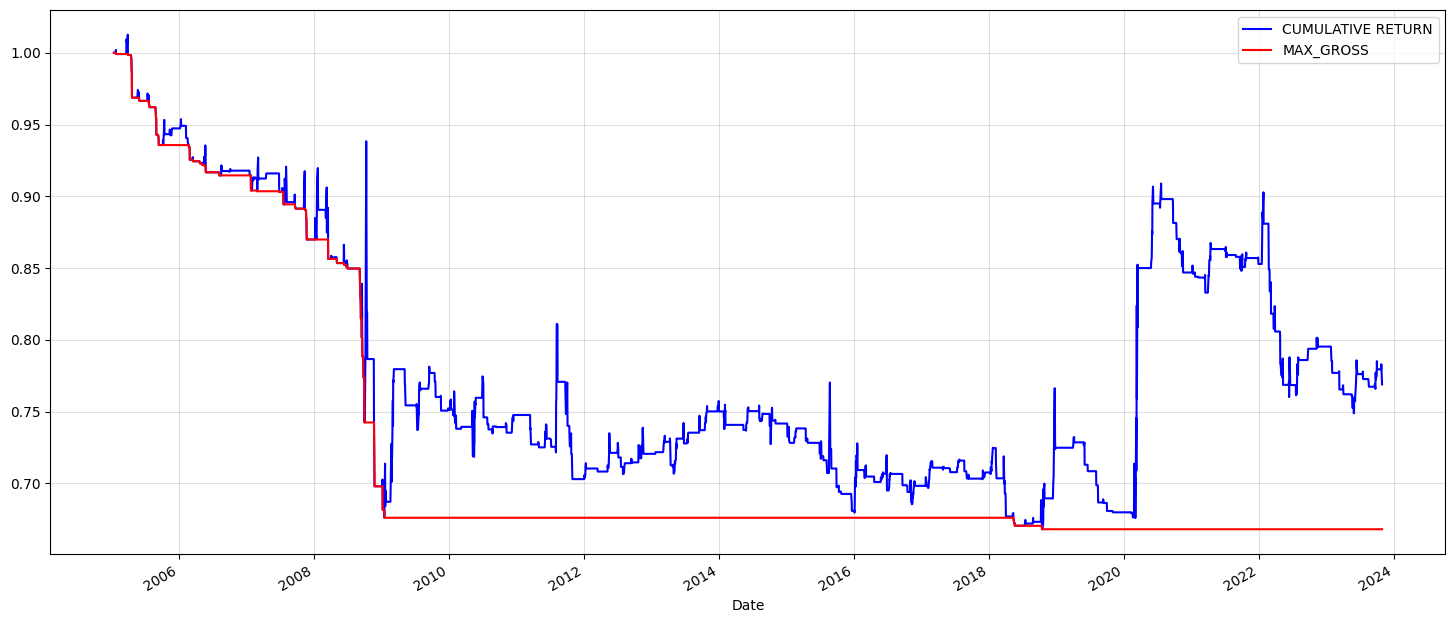

In [ ]:
mmt['CUMULATIVE RETURN'] = \
    mmt['Strategy'].cumsum().apply(np.exp)

mmt['MAX_GROSS'] = \
    mmt['CUMULATIVE RETURN'].cummin()

(
    mmt
    [['CUMULATIVE RETURN','MAX_GROSS']]
    .dropna()
    .plot(figsize = [18, 8],
          color=['blue', 'red']
         )
)

In [ ]:
drawdown_MS = (mmt['CUMULATIVE RETURN']/mmt['MAX_GROSS']) - 1

drawdown_MS.max()


0.3605005159120671

In [ ]:
periods_MS =\
(
    drawdown_MS[drawdown_MR == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_MS[drawdown_MR == 0].index[   : -1].to_pydatetime()
)
periods_MS.max()

datetime.timedelta(days=1218)

Ah well! Mean reversion results were definitely much prettier!

# PART 3

In [ ]:
strategies = {
    'Sharpe ratio': {
        'Strategy 1': round(Sharpe_MR, 3),
        'Strategy 2': round(Sharpe_VB, 3),
        'Strategy 3': round(Sharpe_SL1, 3),
        'Strategy 4': round(Sharpe_SL2, 3),
        'Strategy 5': round(Sharpe_MS, 3),

    },
    'CAGR': {
        'Strategy 1': round(CalculateCAGR(df1, MR_Cash), 3),
        'Strategy 2': round(CalculateCAGR(df2, VB_Cash), 3),
        'Strategy 3': round(CalculateCAGR(result, SL1_Cash), 3),
        'Strategy 4': round(CalculateCAGR(test_data, SL2_Cash), 3),
        'Strategy 5': round(CalculateCAGR(mmt, MS_Cash), 3),

    },
    'Maximum drawdown': {
        'Strategy 1': round(-drawdown_MR.min(), 3),
        'Strategy 2': round(-drawdown_VB.min(), 3),
        'Strategy 3': round(-drawdown_SL1.min(), 3),
        'Strategy 4': round(-drawdown_SL2.min(), 3),
        'Strategy 5': round(drawdown_MS.max(), 3),

    },
    'Cash left': {
        'Strategy 1': round(MR_Cash, 3),
        'Strategy 2': round(VB_Cash, 3),
        'Strategy 3': round(SL1_Cash, 3),
        'Strategy 4': round(SL2_Cash, 3),
        'Strategy 5': round(MS_Cash, 3),

    },
    'Maximum drawdown period': {
        'Strategy 1': periods_MR.max(),
        'Strategy 2': periods_VB.max(),
        'Strategy 3': periods_SL1.max(),
        'Strategy 4': periods_SL2.max(),
        'Strategy 5': periods_MS.max(),

    }
}


# Affichage des métriques pour chaque stratégie
for metric, strategies_data in strategies.items():
    print(f"{metric} for different strategies:")
    for strategy, value in strategies_data.items():
        print(f"{metric} of {strategy}: {value}")
    print()

Sharpe ratio for different strategies:
Sharpe ratio of Strategy 1: 0.003
Sharpe ratio of Strategy 2: 0.177
Sharpe ratio of Strategy 3: 0.097
Sharpe ratio of Strategy 4: 0.101
Sharpe ratio of Strategy 5: -0.037

CAGR for different strategies:
CAGR of Strategy 1: 0.18
CAGR of Strategy 2: 13.22
CAGR of Strategy 3: 64.46
CAGR of Strategy 4: 18.44
CAGR of Strategy 5: -1.39

Maximum drawdown for different strategies:
Maximum drawdown of Strategy 1: 0.401
Maximum drawdown of Strategy 2: 0.253
Maximum drawdown of Strategy 3: 1.0
Maximum drawdown of Strategy 4: 0.245
Maximum drawdown of Strategy 5: 0.361

Cash left for different strategies:
Cash left of Strategy 1: 103478.131
Cash left of Strategy 2: 1057207.249
Cash left of Strategy 3: 646201.18
Cash left of Strategy 4: 184425.2
Cash left of Strategy 5: 76898.768

Maximum drawdown period for different strategies:
Maximum drawdown period of Strategy 1: 1218 days, 0:00:00
Maximum drawdown period of Strategy 2: 1057 days, 0:00:00
Maximum drawdown


Strategy 1 : Mean reversion strategy <br>
Strategy 2 : Vectorized Backtesting of regression based strategy <br>
Strategy 3 : Supervised Machine Learning attempt 1 <br>
Strategy 4 : Supervised Machine Learning attempt 2 <br>
Strategy 5 : Momentum strategy <br>


Sharpe ratio for different strategies:<br>
Sharpe ratio of Strategy 1: 0.003 (Score: 2)<br>
Sharpe ratio of Strategy 2: 0.177 (Score: 5)<br>
Sharpe ratio of Strategy 3: 0.097 (Score: 3)<br>
Sharpe ratio of Strategy 4: 0.101 (Score: 4)<br>
Sharpe ratio of Strategy 5: -0.037 (Score: 1)<br>
<b>More points for higher Sharpe ratio</b><br><br>

CAGR for different strategies:<br>
CAGR of Strategy 1: 0.18 (Score: 2)<br>
CAGR of Strategy 2: 13.22 (Score: 3)<br>
CAGR of Strategy 3: 64.46 (Score: 5)<br>
CAGR of Strategy 4: 18.44 (Score: 4)<br>
CAGR of Strategy 5: -1.39 (Score: 1)<br>
<b>More points for higher CAGR</b><br><br>

Maximum drawdown for different strategies:<br>
Maximum drawdown of Strategy 1: 0.401 (Score: 2)<br>
Maximum drawdown of Strategy 2: 0.253 (Score: 4)<br>
Maximum drawdown of Strategy 3: 1.0 (Score: 1)<br>
Maximum drawdown of Strategy 4: 0.245 (Score: 5)<br>
Maximum drawdown of Strategy 5: 0.361 (Score: 3)<br>
<b>More points for lower maximum drawdown</b><br><br>

Cash left for different strategies:<br>
Cash left of Strategy 1: 103478.131 (Score: 2)<br>
Cash left of Strategy 2: 1057207.249 (Score: 5)<br>
Cash left of Strategy 3: 646201.18 (Score: 4)<br>
Cash left of Strategy 4: 184425.2 (Score: 3)<br>
Cash left of Strategy 5: 76898.768 (Score: 1)<br>
<b>More points for maximum cash left</b> <br>

Maximum drawdown period for different strategies:<br>
Maximum drawdown period of Strategy 1: 1218 days (Score: 2)<br>
Maximum drawdown period of Strategy 2: 1057 days (Score: 3)<br>
Maximum drawdown period of Strategy 3:  18 days (Score: 5)<br>
Maximum drawdown period of Strategy 4:  70 days (Score: 4)<br>
Maximum drawdown period of Strategy 5: 1218 days (Score: 2)<br>
<b>More points for shorter maximum drawdown period</b> <br>



Strategy 1 Total Score: (2 + 2 + 2 + 2 + 2) = 10 <br>
Strategy 2 Total Score: (5 + 3 + 4 + 5 + 3) = 20 <br>
Strategy 3 Total Score: (3 + 5 + 1 + 4 + 5) = 18 <br>
Strategy 4 Total Score: (4 + 4 + 5 + 3 + 4) = 20 <br>
Strategy 5 Total Score: (1 + 1 + 2 + 1+ 2) = 7 <br>


# Results
Rank 1: Strategy 2 <br>
Rank 1: Strategy 4  <br>
Rank 2: Strategy 3 <br>
Rank 3: Strategy 1 <br>
Rank 4: Strategy 5 <br> <br>

# New section

# Part 4

## Self-Critique

#### Strategy 1: Mean Reversion Strategy
> - **Reflection on Efficacy**: This strategy's core principle is the reversion of prices to their mean. However, it's crucial to note that markets don't always adhere to mean reversion, especially during periods of significant trends or market upheavals.

> - **Enhancement Potential**: Enhancing this strategy might involve integrating adaptive mechanisms to identify and respond to market phases where mean reversion is less likely to occur.

#### Strategy 2: Regression-Based Vectorized Backtesting
> - **Critical Analysis**: The strategy's moderate success points to the limitations inherent in assuming linear market relationships. Financial markets often exhibit complex, non-linear behaviors that simple regression models may fail to capture.

> - **Strategic Adjustments**: Incorporating non-linear modeling techniques or machine learning algorithms could potentially enhance the strategy’s ability to navigate complex market dynamics.

#### Strategy 3: Supervised Machine Learning Model
> - **Performance and Risk Evaluation**: The exceptional metrics achieved by this strategy necessitate a critical evaluation for overfitting. The results, while promising, should be rigorously tested against unseen data sets.

> - **Risk-Adjusted Refinement**: Enhancing the model to include risk management parameters might provide a more comprehensive understanding of its performance under adverse market conditions.


#### Strategy 4: Supervised Machine Learning with a Balanced Approach
> - **Holistic Viewpoint**: This strategy's more moderate performance metrics suggest a potentially more realistic and sustainable approach in diverse market environments

> - **Continuous Evolution Strategy**: To maintain its relevance, this strategy should undergo continual refinement, incorporating new market data and adaptive algorithms to evolve with market trends.

#### Strategy 5 : Momentum strategy

> - **Reflection on Efficacy**: The Momentum strategy, combining Ichimoku Cloud Analysis and CCI, excels in capturing market momentum. However, it's important to recognize that momentum strategies may face challenges during choppy or range-bound market conditions.

> - **Enhancement Potential**: To refine this strategy, considering additional filters or indicators that can discern between genuine momentum and false signals in varying market environments may bolster its adaptability and robustness.

The final assignment's ranking system provides a clear hierarchy of performance, aiding in strategic decision-making for potential implementation. Further refinement and optimization could enhance the overall robustness of the strategies, contributing to more informed investment decisions.

#### Overarching Themes for Improvement
> - **Comprehensive Market Testing**: Testing against a broader spectrum of market conditions is necessary for all strategies to ascertain their true robustness and versatility.

> - **Bias and Error Mitigation**: A deeper dive into data integrity and modeling assumptions is needed to minimize biases like survivorship and lookahead. This could involve revisiting the data selection process and employing more rigorous cross-validation techniques. We can consider approaches and aspects such as incorporate historical and removed companies: Ensure our dataset includes not just current constituents of the S&P 500 but also those companies that were part of the index in the past and have since been removed, providing a more comprehensive historical perspective. And out-of-sample testing: Perform rigorous out-of-sample testing using data that was not included in the training set, to validate the model's predictive power without the influence of future information. This testing should mimic real-world conditions as closely as possible.

> - **Practical Application Considerations**: Assessing the impact of real-world factors such as transaction costs and liquidity constraints is essential. The backtesting environment should closely mimic actual trading conditions to ensure the strategies' practical viability.

> - **Dynamic Strategy Evolution**: Embracing an ethos of continuous learning and iterative improvement will be vital. Incorporating fresh data and feedback into the strategies will help in keeping them aligned with current market realities.

## Thank you Prof Roh for this final assignment!

Hope to see you again soon!